*Kobe for the win !*

Reste à faire :
* Alix
    * ~~Régler son problème avec GridSearch~~ (voir si on pourrait utiliser ça aussi dans la dernière partie)
* Mahery
    * "Psychology of a Professional Athlete" [cf Favoris]
    * Commenter ma dernière partie hihi
* JB
    * ~~Régler le problème de la visualisation du decision tree~~
    * ~~Rassembler les travaux de pendant les vacs~~
    * Commenter ma partie
    * Commencer à voir pour exporter PDF
* Tout le monde
    * ~~Uniformiser & couleurs des Lakers~~
    * Intro
    * Conclusion
    * Plus de bla bla ?

# Importing packages and data

## Importing packages

This first cell will be importing all the packages we need throughout our work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.patches import Circle, Rectangle, Arc
import nbconvert
from pandas import Series, DataFrame
from ipywidgets import widgets
from IPython.display import display
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import mixture
import sklearn.ensemble
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import time
import itertools
import operator
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Importing data

In [2]:
brut = pd.read_csv("data.csv")
brut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

## First treatment of the data

The dataframe we'll be working on is composed of 25 columns for the 25 variables and 30,697 lines (one for each shot Kobe Bryant took during his carrer).

In [3]:
brut.isnull().values.any()

True

In [4]:
brut['shot_made_flag'].isnull().sum()

5000

Concerning the *target* variable : `shot_made_flag`, 5,000 values are missing.

We remove every line where this variable has the value NULL since they are useless to either test or train.

In [5]:
clean=brut[~brut['shot_made_flag'].isnull()] # OR clean = brut.dropna()
clean.info()
clean = clean.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

In [6]:
clean.isnull().values.any()

False

In [7]:
clean.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


# Understanding and visualising the data

## Variables

We can divide the 23 of the 25 columns into 4 types of characteristics, so that in addition to the shot's ID `shot_id` and the target variable `shot_made_flag` we now have :

* The time characteristics (`seconds_remaining`, `minutes_remaining`, `period`)
* The location characteristics (`loc_x`, `loc_y`, `lat`, `lon`, `shot_distance`) and the zone characteristics (`shot_zone_area`, `shot_zone_basic`, `shot_zone_range`)
* The action characteristics (`action_type`, `combined_shot_type`, `shot_type`)
* The game characteristics (`game_event_id`, `game_id`, `playoffs`, `season`, `team_id`, `team_name`, `game_date`, `matchup`, `opponent`)

## Time characteristics

### Combining minutes and seconds into one variable

We observe that `minutes_remaining` takes values from 0 to 11, so we conclude that it's the time in minutes remaining until the end of each of the four 12-minute periods.

`seconds_remaining` takes values from 0 to 59 as expected.

We are going to combine these two variables into a new one : `time_remaining`

In [8]:
clean.insert(len(clean.columns), 'time_remaining',
             Series(clean.minutes_remaining*60 + clean.seconds_remaining))
clean = clean.drop('seconds_remaining',1)
clean = clean.drop('minutes_remaining',1)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 24 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name             25697 non-null object
game_date             25697 non-null object
matchup         

We are now going to take a look at the amount of shot Kobe Bryant made in each period.

A regular NBA game usually lasts for four periods but in case of a tie game, a 5-min overtime is added
in the end to untie the game (that's how we can sometimes account for 7 periods in one single game).

### Share per period

shot_made_flag   0.0   1.0
period                    
1               3580  3120
2               3106  2529
3               3827  3175
4               3543  2500
5                156   124
6                 16    14
7                  4     3


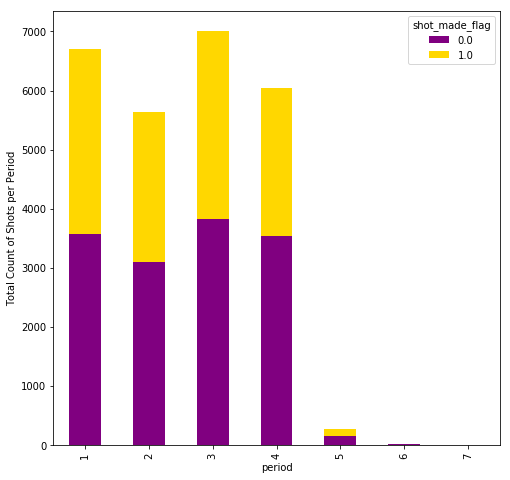

In [9]:
countz = pd.crosstab(index=clean["period"], columns=clean["shot_made_flag"])
print(countz)
countz.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('Total Count of Shots per Period')
plt.show()

### Success per period

shot_made_flag       0.0       1.0
period                            
1               0.534328  0.465672
2               0.551198  0.448802
3               0.546558  0.453442
4               0.586298  0.413702
5               0.557143  0.442857
6               0.533333  0.466667
7               0.571429  0.428571


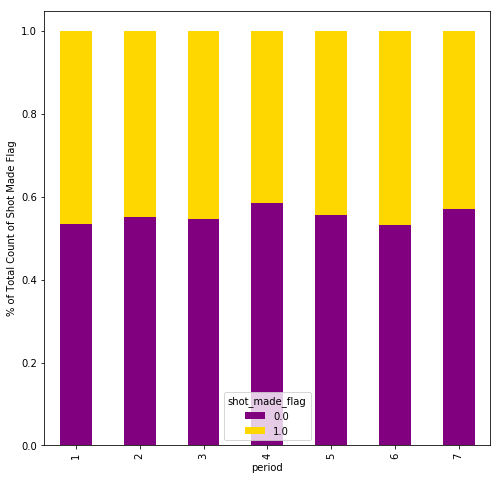

In [10]:
relative = countz.div(countz.sum(axis=1), axis=0)
print(relative)
relative.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('% of Total Count of Shot Made Flag')
plt.show()

The first plot shows that there is far less data for the periods 5 to 7, as expected. Apart from that, it seems our player takes shots approximately equally in each of the four periods.

As explained before, a 5-minute period is added at the end as long as the game is tied. This can lead to games with crazy scenari as it did during the fifth and final game of the NBA Finals in 1976 between the Boston Celtics and the Phoenix Suns. On the court of the Boston Garden, three overtime periods were needed for the Celtics to finally win 128 to 126 in a game that many consider as "the best game of all time". It was the first game of the NBA Finals that ever needed as many overtimes.

The record number of overtime for a game is six. Indeed, on 6 January 1951, the Indianapolis Olympians needed six OT to get rid of the Rochester Royals : this led to a game of 78 effective minutes instead of the usual 48-minute games !

### Seconds remaining from the end of period

Let's now have a look at the number of shots he took as time passes by.

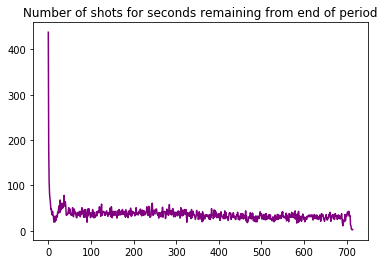

In [11]:
secondz = clean[['shot_made_flag', 'time_remaining']]

keyz, countz = np.unique(secondz['time_remaining'], return_counts=True)
plt.plot(keyz, countz, c='Purple')
plt.title("Number of shots for seconds remaining from end of period")
plt.show()

We observe consistancy during the whole game concerning the amount of shot Bryant takes.
There's however a substancial increase in the last few seconds right after a slight drop.

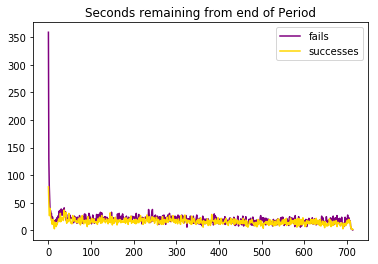

In [12]:
failz=secondz[secondz['shot_made_flag']==0]
successez=secondz[secondz['shot_made_flag']==1]

keyz0, countz0 = np.unique(failz['time_remaining'], return_counts=True)
keyz1, countz1 = np.unique(successez['time_remaining'], return_counts=True)

x1=keyz0
x2=keyz1
y1=countz0
y2=countz1
plt.plot(x1, y1, label="fails", color="purple")
plt.plot(x2, y2, label="successes", color="gold")
plt.legend()
plt.title("Seconds remaining from end of Period")

plt.show()

Now in order to have a closer look to what's going on during the game, we're going to get rid of the last ten seconds of the game : the scale will be much more suitable.

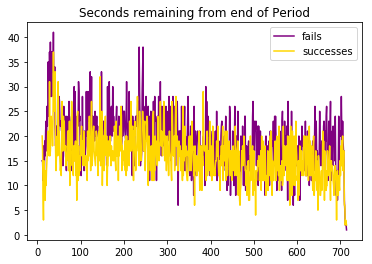

In [13]:
secondz = secondz[secondz['time_remaining']>10]

failz=secondz[secondz['shot_made_flag']==0]
successez=secondz[secondz['shot_made_flag']==1]

keyz0, countz0 = np.unique(failz['time_remaining'], return_counts=True)
keyz1, countz1 = np.unique(successez['time_remaining'], return_counts=True)

x1=keyz0
x2=keyz1
y1=countz0
y2=countz1
plt.plot(x1, y1, label="fails", color="purple")
plt.plot(x2, y2, label="successes", color="gold")
plt.legend()
plt.title("Seconds remaining from end of Period")

plt.show()

We can see here that the number of successful shots as well as the number of failed shots progressively increases as we get closer to the end of period, then plummets around one minute before the end of period (and then eventually skyrockets during the last few seconds).

It can be explained by the fact that the offensive team only has 24 seconds to get a shot attempt (otherwise they turn the ball over to the opposite team). Therefore, as the game gets closer to its end, players try to make an efficient use of the 24 seconds : they slow down the rythm if they are in the lead or get slowed down by their opponents who are keeping the ball away from them for 24 seconds.

Moreover, each team is trying to have the very last possession in order to take the last shot (and leave no opportunity to the other team to respond) which also is a reason for the number of shots to go down (before going right back up in the last ten seconds).

However, the proportion of successful shots does not seem to change much (except maybe for the last few seconds).
Thus, the variable `time_remaining` will probably not influence the prediction of the variable `shot_made_flag` much.

We could still simplify by creating two or three modalities in the `time_remaining`.

*For example : in the last few seconds, the shot is less likely successful.*

We have to be careful with the colinearity though.

*For example between "shot made in the last few seconds" and "back court shot"*

## Localisation caracteristics

### `Loc_x` & `Loc_y` vs `Lon` & `Lat`

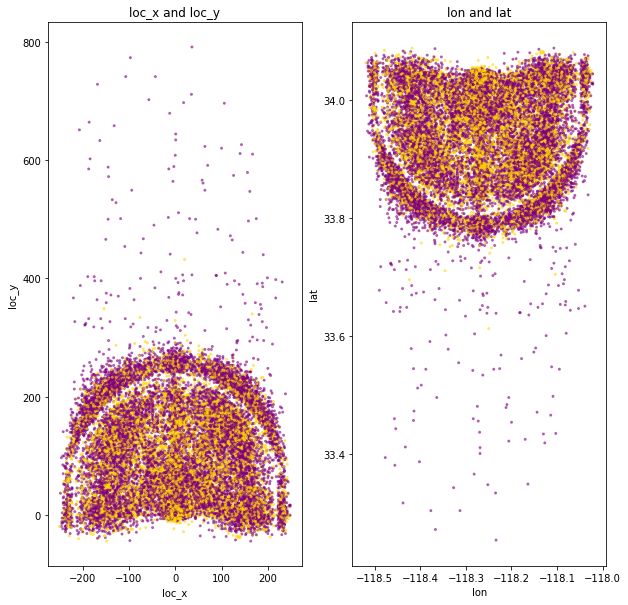

In [14]:
plt.figure(figsize=(10,10))

#Creating a vector that will turn green if the shot is made and red otherwise.

colors = np.where(clean['shot_made_flag']==1, "Gold", "Purple");
colors.shape

plt.subplot(121)
plt.title('loc_x and loc_y')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
plt.scatter(clean.loc_x, clean.loc_y, color=colors, s=4, alpha=0.5)

plt.subplot(122)
plt.title('lon and lat')
plt.xlabel('lon')
plt.ylabel('lat')
plt.scatter(clean.lon, clean.lat, color=colors, s=4, alpha=0.5)

We see here that the variables `loc_x`, `loc_y` and the variables `lon`, `lat` give the same data, the only difference relies on the orientation.

In order to confirm what we expected, we choose to check the correlation coefficient between `lon` and `loc_x` and between `lat` and `loc_y`.

In [15]:
print("Correlation coefficient between lon and loc_x :", np.corrcoef(clean['lon'], clean['loc_x'])[1, 0])
print("Correlation coefficient between lat and loc_y :", np.corrcoef(clean['lat'], clean['loc_y'])[1, 0])

Correlation coefficient between lon and loc_x : 0.9999999999999997
Correlation coefficient between lat and loc_y : -1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


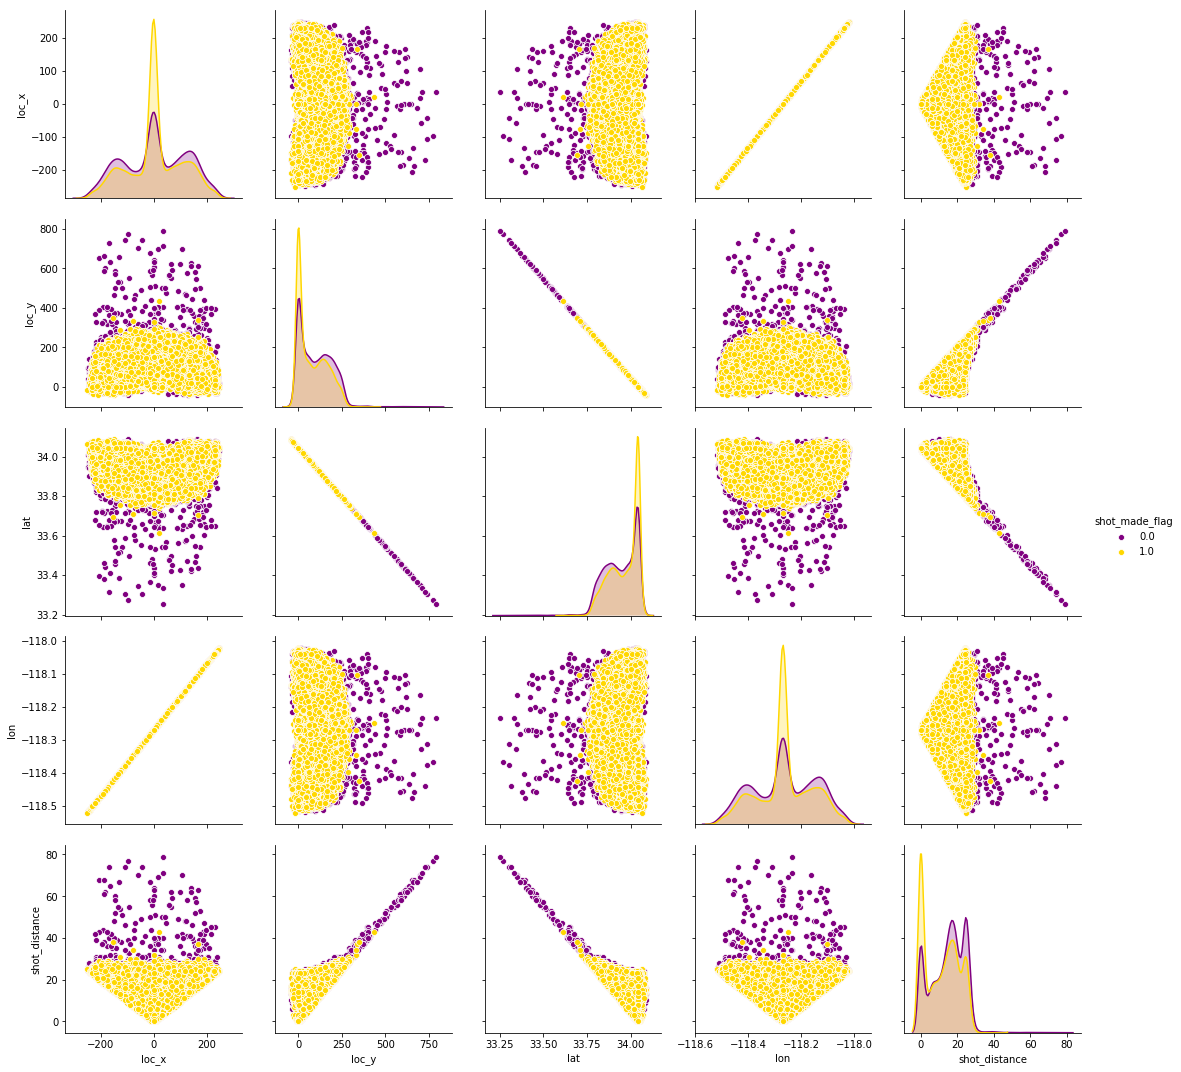

In [16]:
import seaborn as sns
pal = ['Purple', 'Gold']
sns.pairplot(clean, vars=['loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'],
            hue='shot_made_flag', height=3, palette = pal)
plt.show()

Thus, we will remove `lon` and `lat` from our dataset.

In [17]:
clean = clean.drop('lon', 1)
clean = clean.drop('lat', 1)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 22 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name             25697 non-null object
game_date             25697 non-null object
matchup               25697 non-null object
opponent              25697 non-null object
shot_id           

We are going to replace `loc_x` and `loc_y` by a new variable `angle` in order to avoid the colinearity with the vaiable `distance`.

In [18]:
A = clean[['loc_x', 'loc_y']].copy()
scaler = preprocessing.StandardScaler().fit(A)
A_st = scaler.transform(A)
clean.loc[:,'angle'] = A_st[:,0]/A_st[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Success per range

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


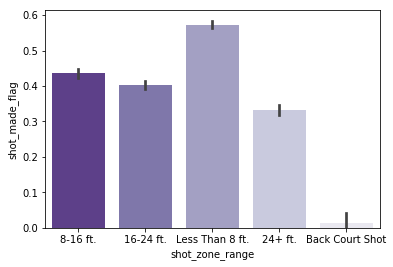

In [19]:
sns.barplot(x='shot_zone_range',
           y='shot_made_flag',
           data=clean,
           palette="Purples_r")

Here is the percentage of the shots Kobe Bryant made in these 5 range categories. As expected, the closer he is to the basket, the more shot he is likely to make.

### Shares of range

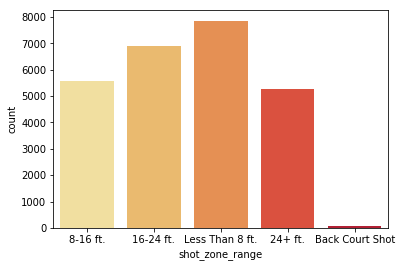

In [20]:
sns.countplot(x="shot_zone_range", data=clean, palette="YlOrRd")

This graph here shows the amount of shot he took per range. Unlike the previous graph, it gives us his favourite ranges which are not the same as the ones from which he made most of his shots : Kobe for example preferred to take 16 to 24 footers instead of 8 to 16-foot shots, even though he was better in the second category.

Bryant was an all-around player able to shoot from 0 to over 24 feet and that's what he did during his entire career. The proportion of shots taken from 8 to 24+ feet are pretty close, despite the fact that he obviously sank more shots from closer range (and took a little more shots from under the basket).

### Success per distance

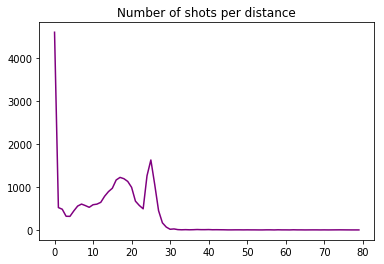

In [21]:
chkdist = clean[['shot_made_flag', 'shot_distance']]

keyz, countz = np.unique(chkdist['shot_distance'], return_counts=True)
plt.plot(keyz, countz, color="purple")
plt.title("Number of shots per distance")
plt.show()

First of all, we observe a little "bump" around 22-24 ft. which is the three-point line.

We also see that there are many shots made from a 0-foot distance which are layups and dunks, so the analysis will separate these on one hand and the shots from a strictly positive distance on the other hand.

#### Zero-distance 

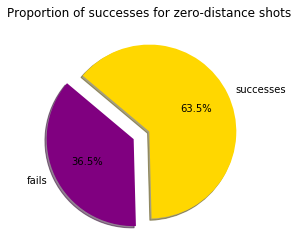

In [22]:
chkdistnul = chkdist[chkdist['shot_distance']==0]

keyz, countz = np.unique(chkdistnul['shot_made_flag'], return_counts=True)
freqz = countz/len(chkdistnul['shot_made_flag'])

plt.pie(freqz, explode=(0.2, 0), labels=("fails", "successes"), colors=['purple', 'gold'],
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Proportion of successes for zero-distance shots")

plt.show()

#### Strictly positive distance

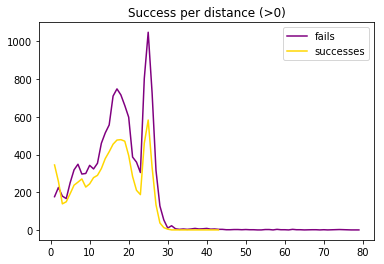

In [23]:
chkdistpos = chkdist[chkdist['shot_distance']>0]

chkdist0=chkdistpos[chkdistpos['shot_made_flag']==0]
chkdist1=chkdistpos[chkdistpos['shot_made_flag']==1]

keyz0, countz0 = np.unique(chkdist0['shot_distance'], return_counts=True)
keyz1, countz1 = np.unique(chkdist1['shot_distance'], return_counts=True)

x1=keyz0
x2=keyz1
y1=countz0
y2=countz1
plt.plot(x1, y1, label="fails", color="purple")
plt.plot(x2, y2, label="successes", color="gold")
plt.legend()
plt.title("Success per distance (>0)")

plt.show()

We can see more precisely the drop before 22 ft. and the following bump where the three-point line is.
There's indeed no interest in taking a shot while being a few inches inside the line (or worse, while stepping on it) since you can score 3 points instead of 2 just by being a little bit further from the basket.

## Zone characteristics

The point now is to classify the shots by their location (and not only their distance from the basket).

We will therefore use 3 types of shot classification that many people such as coaches, scouts or just basketball scientists use to divide the shot charts into several categories.

### `shot_zone_area`

In [24]:
groups = clean.groupby('shot_zone_area')
for column, frame in groups :
    print('column: {0},   frame: {1}'.format(column, len(frame)))

column: Back Court(BC),   frame: 72
column: Center(C),   frame: 11289
column: Left Side Center(LC),   frame: 3364
column: Left Side(L),   frame: 3132
column: Right Side Center(RC),   frame: 3981
column: Right Side(R),   frame: 3859


### `shot_zone_basic`

In [25]:
groups = clean.groupby('shot_zone_basic')
for column, frame in groups :
    print('column: {0},   frame: {1}'.format(column, len(frame)))

column: Above the Break 3,   frame: 4720
column: Backcourt,   frame: 60
column: In The Paint (Non-RA),   frame: 3880
column: Left Corner 3,   frame: 240
column: Mid-Range,   frame: 10532
column: Restricted Area,   frame: 5932
column: Right Corner 3,   frame: 333


### `shot_zone_range`

In [26]:
groups = clean.groupby('shot_zone_range')
for column, frame in groups :
    print('column: {0},   frame: {1}'.format(column, len(frame)))

column: 16-24 ft.,   frame: 6907
column: 24+ ft.,   frame: 5281
column: 8-16 ft.,   frame: 5580
column: Back Court Shot,   frame: 72
column: Less Than 8 ft.,   frame: 7857


### Visualisation

<Figure size 360x720 with 0 Axes>

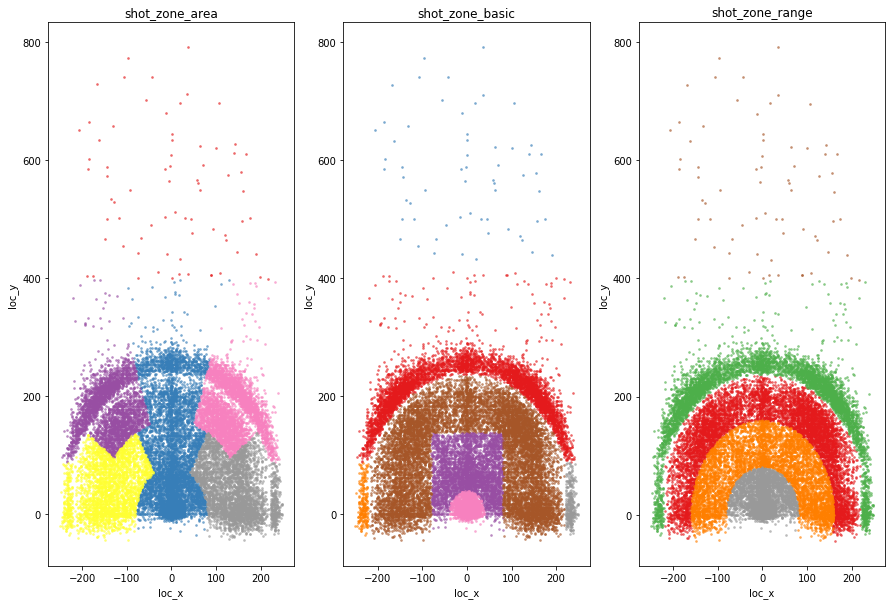

In [27]:
import matplotlib.cm as cm
plt.figure(figsize=(5,10))

def area_plots(var):
    groups = clean.groupby(var)
    colors = cm.Set1(np.linspace(0,1,len(groups)))
    for g,c in zip(groups,colors) :
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, s=3, alpha=0.5)
        
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.title('shot_zone_area')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
area_plots('shot_zone_area')

plt.subplot(132)
plt.title('shot_zone_basic')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
area_plots('shot_zone_basic')

plt.subplot(133)
plt.title('shot_zone_range')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
area_plots('shot_zone_range')

The figures we obtain from the study help us to understand and view the shooting distribution better than if we just had the numbers we got in the first place.

### Conclusions

As we observed the numbers, we took notice that there was a big gap between the number of shots made from each zone.
These figures then shedded light on the shot distribution and how these 3 types of classification divide the basketball court.

*For example : very few shots are made from the back court*

We will have to take this into account when creating a model.

In [28]:
clean = clean.drop('loc_x', 1)
clean = clean.drop('loc_y', 1)

To go further in the study, we can have a look at the number of succesful shots per area.

### Success per Shot Zone - Area

shot_made_flag          0.0   1.0
shot_zone_area                   
Back Court(BC)           71     1
Center(C)              5356  5933
Left Side Center(LC)   2149  1215
Left Side(L)           1889  1243
Right Side Center(RC)  2458  1523
Right Side(R)          2309  1550


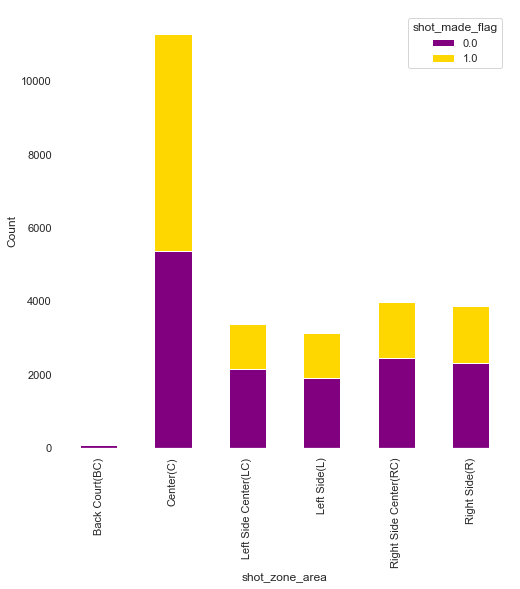

In [217]:
table0 = pd.crosstab(index=clean["shot_zone_area"], columns=clean["shot_made_flag"])

print(table0)

table0.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('Count')
plt.show()

When considering the number of shots, as we just did, the histogram is very hard to read.

Therefore, we will consider the proportion of succesful shots rather than the number of successful shots.

shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         0.986111  0.013889
Center(C)              0.474444  0.525556
Left Side Center(LC)   0.638823  0.361177
Left Side(L)           0.603129  0.396871
Right Side Center(RC)  0.617433  0.382567
Right Side(R)          0.598342  0.401658


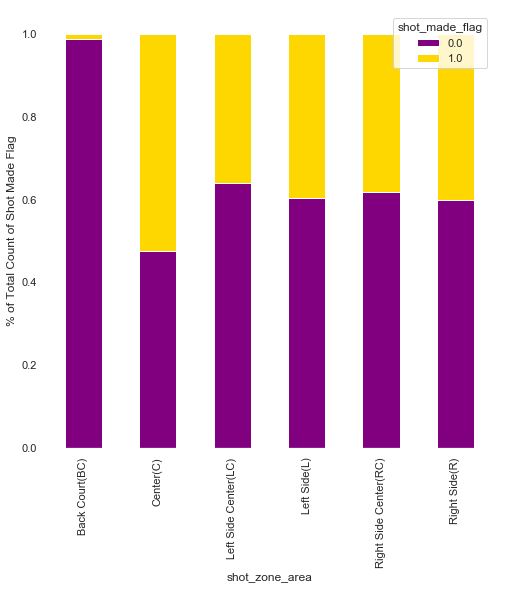

In [218]:
relative0 = table0.div(table0.sum(axis=1), axis=0)
print(relative0)
relative0.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('% of Total Count of Shot Made Flag')
plt.show()

When now considering both the numbers and the histogram we can observe Bryant's accuracy from the different areas of the court. He seems to be a little bit more precise from the right side of the court with 38% and 40% of made shot compared to 36% and 39%.

### Success per Shot Zone - Basic

We will now do the exact same analysis with the second division of the court.

shot_made_flag          0.0   1.0
shot_zone_basic                  
Above the Break 3      3166  1554
Backcourt                59     1
In The Paint (Non-RA)  2117  1763
Left Corner 3           151    89
Mid-Range              6253  4279
Restricted Area        2266  3666
Right Corner 3          220   113


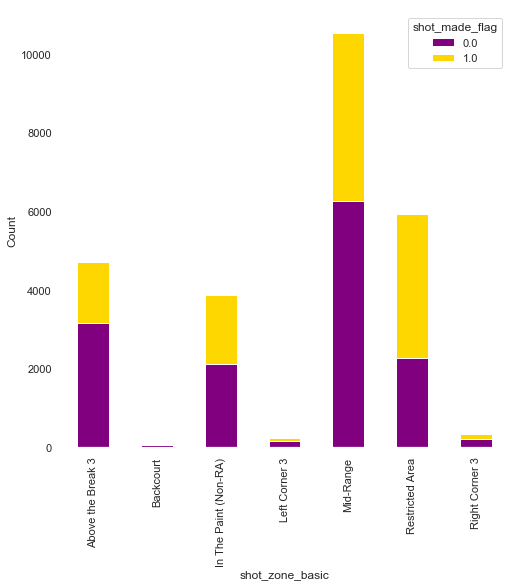

In [220]:
table = pd.crosstab(index=clean["shot_zone_basic"], columns=clean["shot_made_flag"])

print(table)

table.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('Count')
plt.show()

Once again the percentage histogram would suit better than this one.

shot_made_flag              0.0       1.0
shot_zone_basic                          
Above the Break 3      0.670763  0.329237
Backcourt              0.983333  0.016667
In The Paint (Non-RA)  0.545619  0.454381
Left Corner 3          0.629167  0.370833
Mid-Range              0.593714  0.406286
Restricted Area        0.381996  0.618004
Right Corner 3         0.660661  0.339339


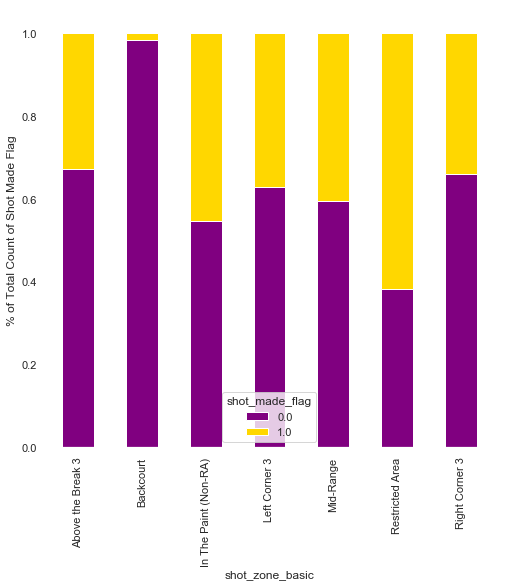

In [221]:
relative = table.div(table.sum(axis=1), axis=0)
print(relative)
relative.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('% of Total Count of Shot Made Flag')
plt.show()

By comparing the numbers and the histogram the same way we just did, we can say that even if the shots Kobe takes the most are the mid-range shot (1st position) and the ones from under the rim, in the restricted area (2nd), the ones he makes more often are from the restricted area first and the paint in second.

## Shot characteristics

The study will now take a look at the type of shot Kobe Bryant took.
Maybe it will help us to determine a certain type of shot that Kobe makes all the time or that he misses very often.

The 3 categories we will study will be the *combined shot type*, the *action type* and the *shot type* :

In [29]:
print("combined_shot_type :")
print(clean.combined_shot_type.unique())
print("action_type :")
print(clean.action_type.unique())
print("shot_type :")
print(clean.shot_type.unique())

combined_shot_type :
['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']
action_type :
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Sh

Apparently `action_type` is a finer-grained categorisation of `combined_shot_type`.

### 2pts/3pts share

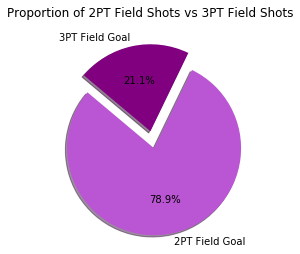

In [30]:
keyz, countz = np.unique(clean['shot_type'], return_counts=True)
freqz=countz/25697
plt.pie(freqz, explode=(0.2, 0), labels=keyz, colors=['mediumorchid', 'purple'],
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Proportion of 2PT Field Shots vs 3PT Field Shots")

plt.show()

The pie chart shows that Kobe took the 3-point option only 1 time out of 5 on average during his career. He would rather take a mid-range jumper or a zero-distance shot instead of a long range shot that he would not make very often.

Let's now verify if he was indeed right in his choices.

### Success per 2pts/3pts

shot_made_flag    0.0   1.0
shot_type                  
2PT Field Goal  10602  9683
3PT Field Goal   3630  1782


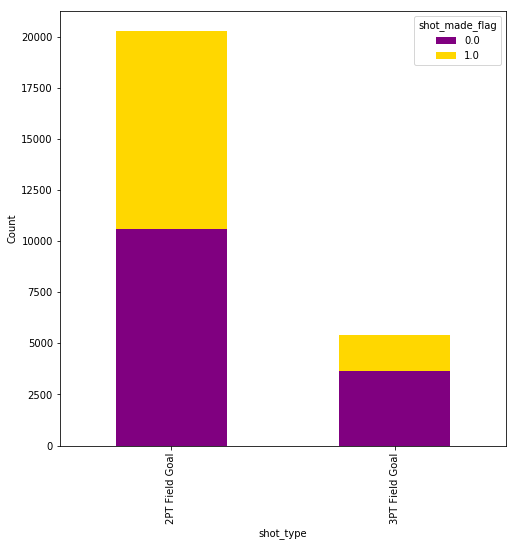

In [31]:
table = pd.crosstab(index=clean["shot_type"], columns=clean["shot_made_flag"])

print(table)

table.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('Count')
plt.show()

This shows that he was more likely to make a 2-pointer than a 3-pointer, as expected.

Even if it's not the main subject, we could wonder if he was right to choose these proportions : Was Bryant right to take that few shots from distance ? Should he have taken more of them ? Fewer ?

As a matter of fact, even if he had a better percentage from closer range, 2 points remain less than 3 so what should he have done ?

One answer could be to take a look at the expectations : he made approximately 47.8% of his 2-pointers and 32.9% of the threes.
This means that he will score an average of 0.956 point per possession when taking a 2-point shot and that he scores 0.987 points on average when shooting from the 3-point line.

Some may then say that if Kobe took more 3-point shots, he would have a worse percentage because it's also a matter of what's the right decision to make at the right time once on the court. Taking nothing but 3-pointers would indeed change his accuracy from distance so let's not jump to conclusion.

### Share of Combined Shot Types

shot_made_flag        0.0   1.0
combined_shot_type             
Bank Shot              25    95
Dunk                   76   980
Hook Shot              59    68
Jump Shot           12002  7708
Layup                1971  2561
Tip Shot               99    53


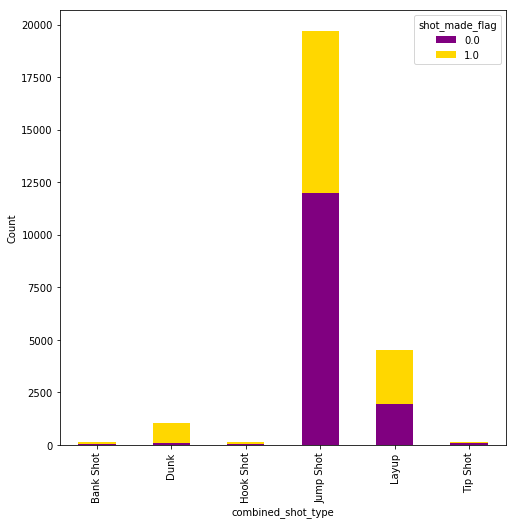

In [32]:
table = pd.crosstab(index=clean["combined_shot_type"], columns=clean["shot_made_flag"])

print(table)

table.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('Count')
plt.show()

We see here that his favourite shot is the jump shot. 

It's indeed the classical way of getting the ball into the rim when playing at his position : Kobe Bryant is a shooting guard. Although he may be very tall for us (6 ft. 6 in, or 1.98 m) he is smaller than the forwards of centers in the NBA, those who stand the closer to the basket. That's why, even if he likes to penetrate the defense and take layups and dunks, his offense mainly relies on his jumper.

When considering the number of shots, as we just did, the success per Combined Shot Type is very hard to read.

Therefore, we will consider the proportion of successful shots rather than the number of successful shots.

### Success per Combined Shot Type

shot_made_flag           0.0       1.0
combined_shot_type                    
Bank Shot           0.208333  0.791667
Dunk                0.071970  0.928030
Hook Shot           0.464567  0.535433
Jump Shot           0.608929  0.391071
Layup               0.434907  0.565093
Tip Shot            0.651316  0.348684


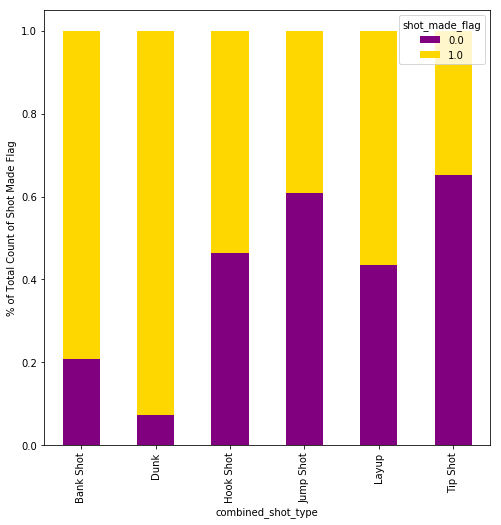

In [33]:
relative = table.div(table.sum(axis=1), axis=0)
print(relative)
relative.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('% of Total Count of Shot Made Flag')
plt.show()

### Success per Action Type

We create the exact same histogram as for the combined action type : we want to observe the proportion of succesful shots rather than the number of successful shots.

In [34]:
countz = pd.crosstab(index=clean["action_type"], columns=clean["shot_made_flag"])
print(countz)

shot_made_flag                     0.0   1.0
action_type                                 
Alley Oop Dunk Shot                  5    90
Alley Oop Layup shot                19    48
Cutting Layup Shot                   2     4
Driving Bank shot                    1     2
Driving Dunk Shot                    6   251
Driving Finger Roll Layup Shot       7    52
Driving Finger Roll Shot            10    58
Driving Floating Bank Jump Shot      0     1
Driving Floating Jump Shot           2     1
Driving Hook Shot                    5     8
Driving Jump shot                   13    10
Driving Layup Shot                 421  1207
Driving Reverse Layup Shot          21    62
Driving Slam Dunk Shot               1    42
Dunk Shot                           48   169
Fadeaway Bank shot                   3    24
Fadeaway Jump Shot                 371   501
Finger Roll Layup Shot               5    23
Finger Roll Shot                    14    12
Floating Jump shot                  26    67
Follow Up 

In [35]:
relative = countz.div(countz.sum(axis=1), axis=0)
print(relative)

shot_made_flag                        0.0       1.0
action_type                                        
Alley Oop Dunk Shot              0.052632  0.947368
Alley Oop Layup shot             0.283582  0.716418
Cutting Layup Shot               0.333333  0.666667
Driving Bank shot                0.333333  0.666667
Driving Dunk Shot                0.023346  0.976654
Driving Finger Roll Layup Shot   0.118644  0.881356
Driving Finger Roll Shot         0.147059  0.852941
Driving Floating Bank Jump Shot  0.000000  1.000000
Driving Floating Jump Shot       0.666667  0.333333
Driving Hook Shot                0.384615  0.615385
Driving Jump shot                0.565217  0.434783
Driving Layup Shot               0.258600  0.741400
Driving Reverse Layup Shot       0.253012  0.746988
Driving Slam Dunk Shot           0.023256  0.976744
Dunk Shot                        0.221198  0.778802
Fadeaway Bank shot               0.111111  0.888889
Fadeaway Jump Shot               0.425459  0.574541
Finger Roll 

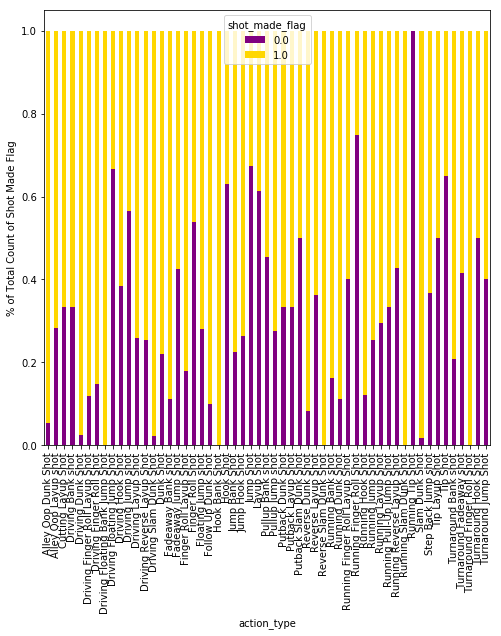

In [36]:
relative.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('% of Total Count of Shot Made Flag')
plt.show()

This classification is very precise, probably too precise as some categories have very few occurences (*Running Tip Shot* only has one). 

Maybe we should find a middle ground and create a classification inbetween `action_type` and `combined_shot_type`.

## Game characteristics

### Playoffs

In [37]:
PO_crosstab = pd.crosstab(index=clean["playoffs"], columns=clean["shot_made_flag"])
print(PO_crosstab)

shot_made_flag    0.0   1.0
playoffs                   
0               12145  9794
1                2087  1671


In [38]:
PO=9794/21939
REG=1671/3758
print(PO,REG)

0.4464196180318155 0.4446514103246408


Kobe's success rate is slightly (very slightly) higher under the pressure of the Playoffs.

For the record, an NBA season accounts for 82 games for each teams, and the 8 best teams of each conference (there's the Eastern and the Western Conference) compete during the Playoffs to become the NBA Champion.

The playoffs are when "things get serious" and the pressure is the highest, but it doesn't seem to affect our player here.

### Season, Date and Injury

In this section we will study the influence of the time on his accuracy. Was he better when he was younger ? Or does he get better with age, such as a good french wine ?

In [39]:
clean["season"].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

shot_made_flag   0.0  1.0
season                   
1996-97          221  162
1997-98          461  349
1998-99          414  351
1999-00          708  604
2000-01          840  735
2001-02          925  783
2002-03         1044  808
2003-04          777  594
2004-05          635  492
2005-06         1051  873
2006-07          856  723
2007-08          967  852
2008-09          985  866
2009-10          968  804
2010-11          842  679
2011-12          813  603
2012-13          720  608
2013-14           35   24
2014-15          370  223
2015-16          600  332


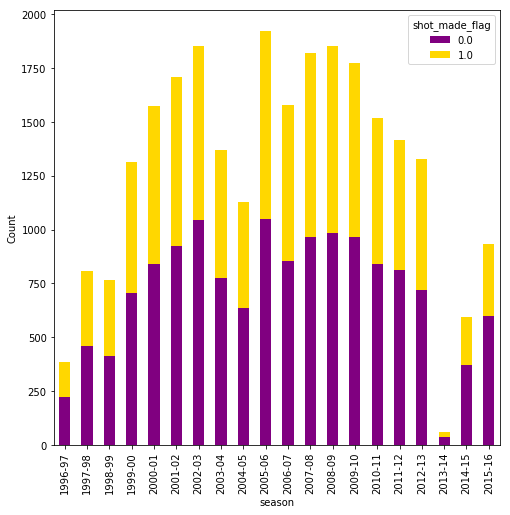

In [40]:
table = pd.crosstab(index=clean["season"], columns=clean["shot_made_flag"])

print(table)

table.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('Count')
plt.show()

We see here that young Kobe wasn't entrusted to take 1,000 shots in his debut, which is normal for a rookie who wasn't the superstar of his team (yet). 

The drop during the 2003-04 and 2004-05 season is due to the arrival of two other superstars (Gary Payton and Karl Malone) to the Los Angeles Lakers so Bryant had to share the ball more often. They afterwards left but the team was suffering from the departure of most of its roster and its coach so they struggled a lot.

Then on April 12, 2013, Kobe Bryant tore is Achille's tendon. It was the beginning of two and a half injury-plagued years and it explains the huge decrease in the end of the histogram.

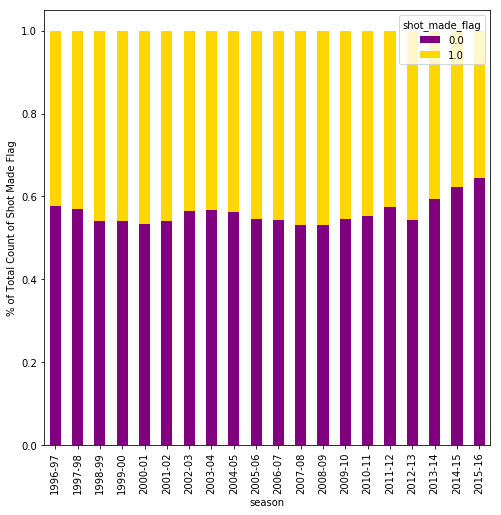

In [41]:
relative = table.div(table.sum(axis=1), axis=0)
relative.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.ylabel('% of Total Count of Shot Made Flag')
plt.show()

The percentage histogram shows that the accuracy of the Laker is mainly the same throughout his career, even if Kobe had to cope with a slight decrease of accuracy in the end.

In [42]:
#from datetime import datetime
#from dateutil.parser import parse
pd.to_datetime(clean['game_date'])

0       2000-10-31
1       2000-10-31
2       2000-10-31
3       2000-10-31
4       2000-10-31
5       2000-10-31
6       2000-10-31
7       2000-10-31
8       2000-10-31
9       2000-11-01
10      2000-11-01
11      2000-11-01
12      2000-11-01
13      2000-11-01
14      2000-11-01
15      2000-11-01
16      2000-11-01
17      2000-11-01
18      2000-11-01
19      2000-11-01
20      2000-11-01
21      2000-11-01
22      2000-11-01
23      2000-11-01
24      2000-11-01
25      2000-11-01
26      2000-11-01
27      2000-11-01
28      2000-11-04
29      2000-11-04
           ...    
25667   2000-06-16
25668   2000-06-16
25669   2000-06-16
25670   2000-06-16
25671   2000-06-16
25672   2000-06-16
25673   2000-06-16
25674   2000-06-19
25675   2000-06-19
25676   2000-06-19
25677   2000-06-19
25678   2000-06-19
25679   2000-06-19
25680   2000-06-19
25681   2000-06-19
25682   2000-06-19
25683   2000-06-19
25684   2000-06-19
25685   2000-06-19
25686   2000-06-19
25687   2000-06-19
25688   2000

### `team_id` &  `team_name`

In [43]:
clean['team_id'].unique()

array([1610612747], dtype=int64)

In [44]:
clean['team_name'].unique()

array(['Los Angeles Lakers'], dtype=object)

Indeed, Kobe Bryant only ever played with the Los Angeles Lakers. We can let go of these two columns.

In [45]:
clean = clean.drop('team_id',1)
clean = clean.drop('team_name',1)

### `matchup` & `opponent`

In [46]:
clean['home'] = Series([1 if 'vs.' in x else 0 for x in clean['matchup']]).to_frame()
clean = clean.drop('matchup', 1)

Both the data from "home" and "matchup" were giving the same information : whether Kobe was playing at the Staples Center in L.A or if he was on an away game. Consequently, we're just going to gather the information in "home" and let go off "matchup".

For the record : There are two NBA teams in Los Angeles and both are playing at the Staples Center : the Lakers and the Clippers. To make a difference when these two teams are facing each other, the colours of the stadium and the court change so that we know who is supposed to be playing at home.

# Pre-processing

## Cleaning the data

In [47]:
df = clean.copy()

#Création des variables "mois" et "année"
df.loc[:,'month'] = df['game_date'].str[5:7].astype(int)
df.loc[:,'year'] = df['game_date'].str[0:4].astype(int)
#Du coup on peut lâcher game_date et season
df = df.drop('game_date', 1)
df = df.drop('season', 1)
#"shot_id", "game_id" et "game_event_id" peuvent servir
#pour les analyses des séries temporelles mais pour
#l'instant ça dégage
df = df.drop('shot_id', 1)
df = df.drop('game_id', 1)
df = df.drop('game_event_id', 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 16 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
period                25697 non-null int64
playoffs              25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
opponent              25697 non-null object
time_remaining        25697 non-null int64
angle                 25697 non-null float64
home                  25697 non-null int64
month                 25697 non-null int32
year                  25697 non-null int32
dtypes: float64(2), int32(2), int64(5), object(7)
memory usage: 2.9+ MB


## Spliting the data into learning data and testing data

We isolate the target variable and then cut the dataframe into the learning data (80%) and the testing data (20%).

In [48]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

Y = np.array(df['shot_made_flag']).astype(int)
X = df.drop('shot_made_flag', 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [49]:
cat = df.select_dtypes([object]).columns
cat

Index(['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'opponent'],
      dtype='object')

We are going to use `get_dummies()` to change the categorical variables into a dummy variable.

In [50]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

We only select the variables in `train` which are not in `test` :

In [51]:
not_in_test = np.setdiff1d(X_train.columns, X_test.columns)
print(not_in_test)

['action_type_Cutting Layup Shot' 'action_type_Driving Bank shot'
 'action_type_Driving Floating Bank Jump Shot'
 'action_type_Putback Dunk Shot' 'action_type_Putback Slam Dunk Shot'
 'action_type_Running Finger Roll Shot'
 'action_type_Running Slam Dunk Shot' 'action_type_Tip Layup Shot'
 'action_type_Turnaround Finger Roll Shot']


Here we do the opposite and select only the variables in `test` which are not in `train` :

In [52]:
not_in_train = np.setdiff1d(X_test.columns, X_train.columns)
print(not_in_train)

['action_type_Running Tip Shot']


In [53]:
for c in not_in_test :
    X_test[c] = 0

X_test = X_test[X_train.columns]

In [54]:
print(X_test.shape, X_train.shape, Y_test.shape, Y_train.shape)

(5140, 121) (20557, 121) (5140,) (20557,)


# Decision Tree

## Searching for the optimum between the overfitting minimum and the prediction maximum

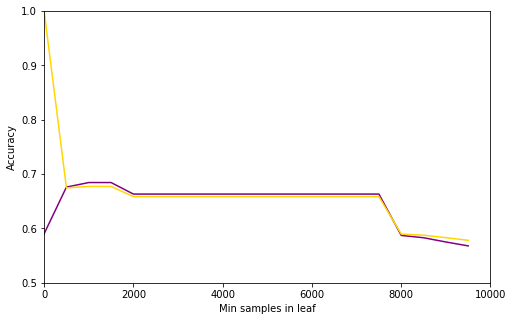

In [55]:
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

r = np.arange(1, 10000, 500)
a = []
b = []

for i in r:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=i,
                                      class_weight='balanced')
    clf = clf.fit(X_train, Y_train)
    a.append(clf.score(X_test, Y_test))
    b.append(clf.score(X_train, Y_train))

plt.figure(figsize=(8,5))
plt.plot(r, a, color="purple")
plt.plot(r, b, color="gold")

plt.xlim(0, 10000)
plt.ylim(0.5, 1)
plt.xlabel('Min samples in leaf')
plt.ylabel('Accuracy')
plt.show()

The orange line represents the train performance and the blue one, the test performance.

We see on this plot that for low values of *"min_samples_leaf"* (ie a high complexity), the model is excellent on the training data but bad on the testing data : that is a sign of overfitting.

Then, the two lines get closer and the optimal zone seems to be between 500 and 1500.

Finally, the performance decreases as the model's complexity decreases (high bias).

## K-fold cross-validation

We will use the `f1 score` to evaluate the model as the `accuracy` does not take into account the ratio of false positive and false negative, which can lead to an error in case of uneven classes.

In [56]:
r=np.arange(250, 5000, 250)
scores=[]
for i in r :
    clf=tree.DecisionTreeClassifier(min_samples_leaf=i,
                                    class_weight='balanced')
    m=model_selection.cross_val_score(clf, X_train, Y_train,
                                       cv=10, scoring='f1')
    scores.append((i, m.mean(), m.var()))
scores

[(250, 0.578943691463927, 0.00012972504136912378),
 (500, 0.5679695470462869, 0.000133926555837902),
 (750, 0.5662639042922152, 0.00011669269414323673),
 (1000, 0.5656968358283473, 9.16357776945175e-05),
 (1250, 0.5656968358283473, 9.16357776945175e-05),
 (1500, 0.5656968358283473, 9.16357776945175e-05),
 (1750, 0.5876398800941247, 6.413537266748798e-05),
 (2000, 0.5876398800941247, 6.413537266748798e-05),
 (2250, 0.5876398800941247, 6.413537266748798e-05),
 (2500, 0.5876398800941247, 6.413537266748798e-05),
 (2750, 0.5876398800941247, 6.413537266748798e-05),
 (3000, 0.5876398800941247, 6.413537266748798e-05),
 (3250, 0.5876398800941247, 6.413537266748798e-05),
 (3500, 0.5876398800941247, 6.413537266748798e-05),
 (3750, 0.5876398800941247, 6.413537266748798e-05),
 (4000, 0.5876398800941247, 6.413537266748798e-05),
 (4250, 0.5876398800941247, 6.413537266748798e-05),
 (4500, 0.5876398800941247, 6.413537266748798e-05),
 (4750, 0.5876398800941247, 6.413537266748798e-05)]

The minimum value of *"min_samples_leaf"* that maximises the `accuracy` and the `f1 score` is 1,750.

We are now going to create a decision tree with this value.

## The model

In [57]:
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1750,
                               class_weight='balanced')
clf=clf.fit(X_train, Y_train)

The main criterion we will consider as we create the decision tree is the "entropy".

## Visualisation of the decision tree

from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns))

In this decision tree, the left leaves represent a succesful shot and the right ones are for a failed attempt :

Kobe is more likely to score if he is taking any other "action type" than a jump shot, and more precisely if it is not a layup.
Similarly, he seems more likely to make his shot if it was taken before 2009 and more precisely during the first half of the game.

Lower entropy values correspond to purer samples.

## Model evaluation

Let's compute the model's performance.

In [58]:
Y_predict = clf.predict(X_test)
Y_predict.shape

(5140,)

In [59]:
acc = metrics.accuracy_score(Y_test, Y_predict, normalize=True)
acc

0.6632295719844358

In [60]:
no = np.where(Y_test==0)[0].size
yes = np.where(Y_test==1)[0].size
print(no,yes)
print(no/(no+yes))

2848 2292
0.5540856031128405


It may seem stupid but the `f1 score` beats the basic majority classifier which always predicts the dominant class (here : a failed shot which, by the way, is a huge lack of respect for M. Bryant). That is already a good thing.

Now, let's look at the confusion matrix :

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
cm

array([[2123,  725],
       [1006, 1286]], dtype=int64)

Text(15.0, 0.5, 'Real class')

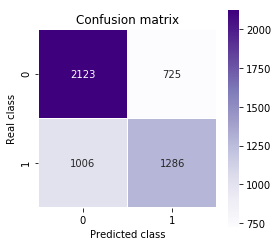

In [62]:
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

The confusion matrix allows us to classify our predictions : the true positives (true as predicted), false positives (false but predicted true), the true negatives (false as predicted) and the false negatives (true but predicted false).

Unfortunately, we have a high number of false negatives.

Finally, we look at the `precision score`, the `recall score` and the `f1 score`.

As a reminder :

Image : Precisionrecall

And the $F_{1}$ score = $2*\frac{precision*recall}{precision+recall}$ 

Image : Scores

In [63]:
metrix ={'precision':metrics.precision_score(Y_test, Y_predict),
         'recall':metrics.recall_score(Y_test, Y_predict),
         'f1':metrics.f1_score(Y_test, Y_predict)}
print(metrix)

{'precision': 0.6394828443560417, 'recall': 0.5610820244328097, 'f1': 0.5977225191726702}


Or we can compute it ourselves, knowing that according to the confusion matrix, we have :
* True positives = 1286
* True negatives = 2123
* False positives = 725
* False negatives = 1006

In [64]:
precision = 1286/(1286+725)
precision

0.6394828443560417

In [65]:
recall = 1286/(1286+1006)
recall

0.5610820244328097

In [66]:
f1 = 2*precision*recall/(precision+recall)
f1

0.5977225191726702

Or, as we know that : $F_{1} = (\frac{recall^{-1}+precision^{-1}}{2})^{-1}$

We have : $F_{1}=\frac{2*VPos}{2*VPos+FPos+FNeg}$

In [67]:
f1=2*1286/(2*1286+1006+725)
f1

0.5977225191726703

# Random Forest

## Tuning the parameters

We first have to tune the parameters. To do so, for each parameter, we look for the value that gives the best results.

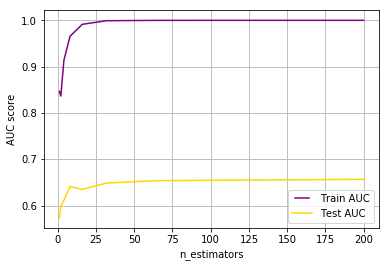

In [68]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(class_weight='balanced', n_estimators=estimator)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   Y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plt.plot(n_estimators, train_results, 'purple', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'gold', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.grid(True, lw = 1, ls = '-', c = '.75')
plt.show()

We see on this graph that, for more than 100 trees, the test performance stops increasing.

We take n_estimators = 100.

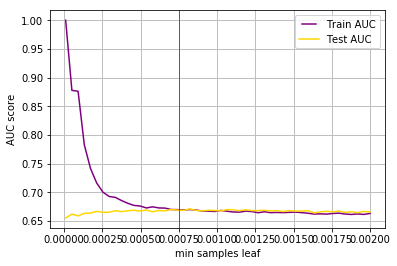

In [69]:
min_samples_leafs = np.linspace(0.00001, 0.002, 50, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, 
                               min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   Y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'purple', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'gold', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.grid(True, lw = 1, ls = '-', c = '.75')
plt.axvline(x=0.00075, linestyle='-', linewidth=0.5, color='black')
plt.show()

The model overfits for values under 0.0005.

We take min_samples_leaf = 0.00075 (which is marked by the black line) .

## Random Forest with Entropy

In [70]:
clf_rfe=RandomForestClassifier(criterion='entropy', class_weight='balanced', 
                               n_estimators=100, min_samples_leaf=0.00075)
clf_rfe=clf_rfe.fit(X_train, Y_train)

Y_predict_rfe = clf_rfe.predict(X_test)

acc_rfe = metrics.accuracy_score(Y_test, Y_predict_rfe, normalize=True)
acc_rfe

0.6865758754863813

Text(15.0, 0.5, 'Real class')

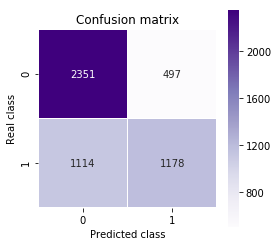

In [71]:
cm_rfe = confusion_matrix(Y_test, Y_predict_rfe)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_rfe, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

In [72]:
metrix_rfe ={'precision':metrics.precision_score(Y_test, Y_predict_rfe),
         'recall':metrics.recall_score(Y_test, Y_predict_rfe),
         'f1':metrics.f1_score(Y_test, Y_predict_rfe)}
print(metrix_rfe)

{'precision': 0.7032835820895522, 'recall': 0.5139616055846422, 'f1': 0.5938996722964456}


## Random Forest with Gini

In [73]:
clf_rfg=RandomForestClassifier(criterion='gini', class_weight='balanced', n_estimators=100, 
                               max_depth=10, min_samples_leaf=0.00075)
clf_rfg=clf_rfg.fit(X_train, Y_train)

Y_predict_rfg = clf_rfg.predict(X_test)

acc_rfg = metrics.accuracy_score(Y_test, Y_predict_rfg, normalize=True)
acc_rfg

0.6741245136186771

Text(15.0, 0.5, 'Real class')

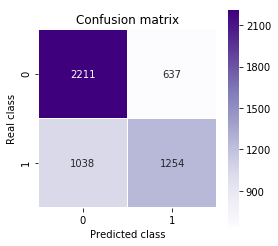

In [74]:
from sklearn.metrics import confusion_matrix
cm_rfg = confusion_matrix(Y_test, Y_predict_rfg)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_rfg, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

In [75]:
metrix_rfg ={'precision':metrics.precision_score(Y_test, Y_predict_rfg),
         'recall':metrics.recall_score(Y_test, Y_predict_rfg),
         'f1':metrics.f1_score(Y_test, Y_predict_rfg)}
print(metrix_rfg)

{'precision': 0.6631411951348493, 'recall': 0.5471204188481675, 'f1': 0.5995696868276356}


## Random Forest using GridSearchCV

In the past models, we tuned each parameter seperately. 

Now, we are going to use GridSearchCV to find the best combination of parameters from a list of possible values.

In [76]:
parameter_candidates_rf = [
  {'min_samples_leaf' : np.linspace(0.00001, 0.002, 20, endpoint=True),
   'n_estimators' : range(25,50,5),
   'criterion' : ['entropy','gini']}
]

In [ ]:
gs_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter_candidates_rf, cv=3)
gs_rf.fit(X_train,Y_train)

In [ ]:
print('Best score for Train :', gs_rf.best_score_)
print('Best n_estimators :',gs_rf.best_estimator_.n_estimators) 
print('Best min_samples_leaf :',gs_rf.best_estimator_.min_samples_leaf)
print('Best criterion :', gs_rf.best_estimator_.criterion)
print('Score for Test :', gs_rf.score(X_test,Y_test))

In [ ]:
Y_predict_rf = gs_rf.predict(X_test)

acc_rf = metrics.accuracy_score(Y_test, Y_predict_rf, normalize=True)
acc_rf

In [ ]:
cm_rf = confusion_matrix(Y_test, Y_predict_rf)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_rf, cmap=plt.cm.Blues, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

In [ ]:
metrix_rf ={'precision':metrics.precision_score(Y_test, Y_predict_rf),
         'recall':metrics.recall_score(Y_test, Y_predict_rf),
         'f1':metrics.f1_score(Y_test, Y_predict_rf)}
print(metrix_rf)

## Comparing the different results

In [78]:
print("Decision Tree :")
print(acc)
print(metrix)
print("")
print("Random Forest avec Entropy :")
print(acc_rfe)
print(metrix_rfe)
print("")
print("Random Forest avec Gini :")
print(acc_rfg)
print(metrix_rfg)
print("")
print("Random Forest using GridSearchCV :")
print("acc_rf")
print("metrix_rf")

Decision Tree :
0.6632295719844358
{'precision': 0.6394828443560417, 'recall': 0.5610820244328097, 'f1': 0.5977225191726702}

Random Forest avec Entropy :
0.6865758754863813
{'precision': 0.7032835820895522, 'recall': 0.5139616055846422, 'f1': 0.5938996722964456}

Random Forest avec Gini :
0.6741245136186771
{'precision': 0.6631411951348493, 'recall': 0.5471204188481675, 'f1': 0.5995696868276356}

Random Forest using GridSearchCV :
acc_rf
metrix_rf


Both random forest models have better accuracy, precision, and f1 score (the random forest using GridSearchCV has a lower f1 score though). However, the decision tree has a better recall.

# Gradient Boosting

## Tuning the parameters

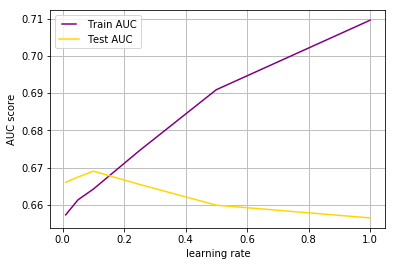

In [79]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, Y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   Y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plt.plot(learning_rates, train_results, 'purple', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'gold', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.grid(True, lw = 1, ls = '-', c = '.75')
plt.show()

High values of learning rate result in overfitting. A learning rate of 0.1 seems to be optimal.

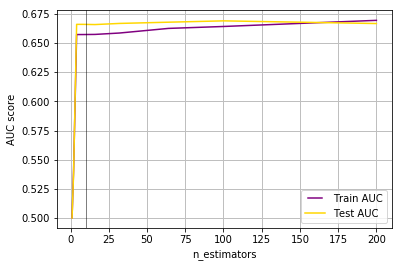

In [80]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=estimator)
   model.fit(X_train, Y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   Y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plt.plot(n_estimators, train_results, 'purple', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'gold', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.grid(True, lw = 1, ls = '-', c = '.75')
plt.axvline(x=10, linestyle='-', linewidth=0.5, color='black')
plt.show()

A number of 10 trees already seems to be optimal here.

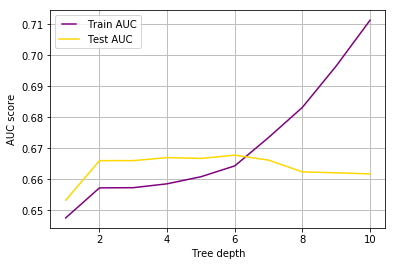

In [81]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, max_depth=max_depth)
   model.fit(X_train, Y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   Y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, 'purple', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'gold', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.grid(True, lw = 1, ls = '-', c = '.75')
plt.show()

A high value of max_depth leads to overfitting.

We take max_depth = 6.

## Gradient Boosting

In [82]:
clf_gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, max_depth=6)
clf_gb=clf_gb.fit(X_train, Y_train)

Y_predict_gb = clf_gb.predict(X_test)

acc_gb = metrics.accuracy_score(Y_test, Y_predict_gb, normalize=True)
acc_gb

0.6869649805447471

Text(15.0, 0.5, 'Real class')

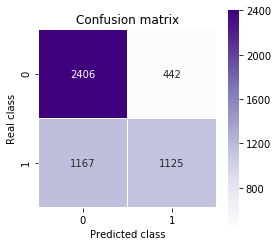

In [83]:
cm_gb = confusion_matrix(Y_test, Y_predict_gb)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_gb, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

In [84]:
metrix_gb ={'precision':metrics.precision_score(Y_test, Y_predict_gb),
         'recall':metrics.recall_score(Y_test, Y_predict_gb),
         'f1':metrics.f1_score(Y_test, Y_predict_gb)}
print(metrix_gb)

{'precision': 0.7179323548181238, 'recall': 0.4908376963350785, 'f1': 0.5830526043016325}


## Gradient Boosting using GridSearchCV

In [85]:
parameter_candidates_gb = [
  {'learning_rate' : np.linspace(0.025, 0.175 , 20, endpoint=True), 
   'n_estimators' : range(5,25,5),
   'max_depth' : range(3,8)}
]

In [ ]:
gs_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=parameter_candidates_gb, cv=3)
gs_gb.fit(X_train, Y_train)

In [ ]:
print('Best score for X :', gs_gb.best_score_) 
print('Best learning_rate :',gs_gb.best_estimator_.learning_rate) 
print('Best n_estimators :',gs_gb.best_estimator_.n_estimators)
print('Best max_depth :',gs_gb.best_estimator_.max_depth) 
print('Score for Test :', gs_gb.score(X_test,Y_test))

In [ ]:
Y_predict_gb2 = gs_gb.predict(X_test)

acc_gb2 = metrics.accuracy_score(Y_test, Y_predict_gb2, normalize=True)
acc_gb2

In [ ]:
cm_gb2 = confusion_matrix(Y_test, Y_predict_gb2)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_gb2, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

In [86]:
metrix_gb2 ={'precision':metrics.precision_score(Y_test, Y_predict_gb2),
         'recall':metrics.recall_score(Y_test, Y_predict_gb2),
         'f1':metrics.f1_score(Y_test, Y_predict_gb2)}
print(metrix_gb2)

NameError: name 'Y_predict_gb2' is not defined

## Comparing the results

In [88]:
print("Decision Tree :")
print(acc)
print(metrix)

print("Random Forest avec Entropy :")
print(acc_rfe)
print(metrix_rfe)

print("Random Forest avec Gini :")
print(acc_rfg)
print(metrix_rfg)

print("Random Forest using GridSearchCV :")
print("acc_rf")
print("metrix_rf")

print("Gradient Boosting :")
print(acc_gb)
print(metrix_gb)

print("Gradient Boosting using GridSearchCV :")
print("acc_gb2")
print("metrix_gb2")

Decision Tree :
0.6632295719844358
{'precision': 0.6394828443560417, 'recall': 0.5610820244328097, 'f1': 0.5977225191726702}
Random Forest avec Entropy :
0.6865758754863813
{'precision': 0.7032835820895522, 'recall': 0.5139616055846422, 'f1': 0.5938996722964456}
Random Forest avec Gini :
0.6741245136186771
{'precision': 0.6631411951348493, 'recall': 0.5471204188481675, 'f1': 0.5995696868276356}
Random Forest using GridSearchCV :
acc_rf
metrix_rf
Gradient Boosting :
0.6869649805447471
{'precision': 0.7179323548181238, 'recall': 0.4908376963350785, 'f1': 0.5830526043016325}
Gradient Boosting using GridSearchCV :
acc_gb2
metrix_gb2


The gradient boosting model has better accuracy and precision than the others, but lower recall and f1 score.

We get slightly better results when we don't use GridSearchCV which is weird since it is suppose to find and use the optimal combination of parameters. That can be explained by the fact that it looks for the best combination of parameters from a limited list of possibilities. We could put more possible values for each parameters but that would also multiply the number of random forests/gradient boosting it has to do, thus it can take a lot of time.

# Machine Learning

## *Home-made* Perceptron

### Présentation

Texte à résumeyyyyyy :

A Tale of Perceptrons
In the 1950s, the nascent field of Artificial Intelligence was split into rivaling factions. Two groups competed for academic mindshare: the top dogs were the “symbolists,” lead by authorities such as Marvin Minsky and John McCarthy; the runners-up were the “connectionists,” led by the charismatic Frank Rosenblatt. The two tribes had very different approaches. The symbolists believed in programming an intelligent machine from the ground up. Piece by piece, they planned to build computers that would eventually manipulate concepts faster and better than humans. This idea might sound overly optimistic today, but it made perfect sense in the 1950s, when people were inventing the first high-level programming languages. Those languages seemed much closer to human thinking than plain old assembly language. Who knew how far that process could go? (In fact, John McCarthy invented one of the first high-level programming languages, LISP, in his quest to code intelligence.) The opposite faction, the connectionists, chased another dream. Their idea could be summed up as: build a brain, and intelligence will come. To simplify things, the brain is made of neurons connected through fibers. Each neuron has multiple input fibers, and one output fiber. If the inputs are active in a certain pattern (maybe because they get a signal from the sensory organs), then the output also activates. The connectionist leader Frank Rosenblatt built a machine inspired by that mechanism. By analogy with neurons, he named the machine “perceptron,” and its final processing step “activation function.” The first perceptron was a far cry from our tiny Python program. The “Mark 1 perceptron” was a room-sized piece of hardware that looked a bit like a server rack covered by an impenetrable tangle of wires. It had a camera connected to 400 photocells—essentially, very lo-res pixels. The weights were implemented with potentiometers wired to the photocells. During the learning phase, the potentiometers were physically rotated by electric motors. To overcome the perceptron’s limitations, the connectionists also studied multilayer perceptrons, which seemed able to tackle non-linearly separable data. Meanwhile, the symbolists were busy writing programs that solved algebra problems and stacked construction blocks with a robot arm. To be fair, neither faction was making much progress towards intelligent machines. On the other hand, both factions were inclined to ballyhoo and extravagant promises. At one point, Rosenblatt declared that the perceptron was the first step towards machines that would not only be damn smart, but even self-conscious. The popular press bought into it hook, line and sinker, making symbolists jealous. The feud went on for years, with the symbolists reaping the lion’s share of research funds, and the connectionists playing the part of the popular underdogs. Then, at some point, things really hit the fan.

From the 50s to the mid-60s, connectionists had been nibbling at AI research funds. The powerful symbolist leader Marvin Minsky thought that was a waste of money, and decided to set things straight once and for all. Minsky’s plan was simple: he would study the connectionist’s ideas, with an eye towards showing their limitations. Together with the like-minded Seymour Papert, he published an entire book on the topic, called “Perceptrons.” The book was essentially Minsky’s way to damn perceptrons with faint praise. It focused a lot on what perceptrons could not learn—such as non-linearly separable data. To their credit, Minsky and Papert admitted that multilayer perceptron could overcome the limitations of regular perceptrons. However, they hasted to add their gut feeling: multilayer perceptrons were probably impossible to train. In their opinion, the whole idea of building intelligence with perceptrons was little more than a pipe dream. Bolstered by Minsky’s reputation, the “Perceptron” book had more impact than the authors themselves intended. Where Minsky and Papert had been nuanced, the scientific community went for the “too long; didn’t read” version: “connectionism is a dead end.” Within a few months, funding for connectionist research dried up. The impact of “Perceptrons” didn’t stop there. The public had been waiting for a perceptron to stand up and ask for a cup of tea anytime soon. Now one of the major AI eggheads was scoffing at the whole thing. The popular opinion switched, and all of connectionism was filed under “unscientific bollocks”. In the early 70s, Rosenblatt died in a sailboat accident. That seemed like the last nail in the perceptron’s coffin.

After connectionism was disgraced, it almost disappeared from academic research. Only a handful of researchers over the world, like medieval monks, kept the study of perceptrons alive. Minsky’s parting questions loomed over them like a prophecy of doom. Were multi-layer perceptrons really impossible to train? Was the entire idea a dead end? Fifteen years passed before they could answer those questions. What they found is the subject of the next part of this notebook.


### Sigmoid

Notre problème de prédiction consiste en une classification binaire.

And binary classification imposes a tight constraint: the output, which is the *weighted sum of the inputs* must not drop below 0, nor raise above 1. Here’s an idea: maybe we can find a function that wraps around the weighted sum, and constrains it to the range from 0 to 1.

Il faut aussi que cette fonction "wrap" fonctionne bien avec la "gradient descent". En effet, nous utilisons cette fonction pour calculer l'output, ce dernier est utilisé pour calculer le "loss", et enfin nous diminuons le "loss" avec l'algorithme de descente de gradient.

Pour le bon fonctionnement de l'algorithme, la fonction "wrap" doit être smooth, sans zones plates (où le gradient tombe à 0) et sans marches verticales soudaines (où le gradient n'est même pas défini).

Bref, quelque chose comme ça :

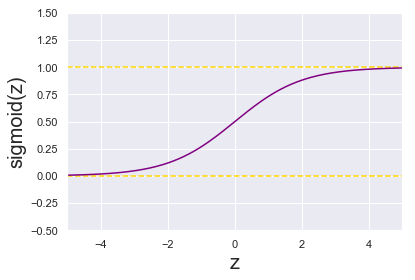

In [89]:
sns.set()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

margin_left = -5
margin_right = 5

plt.axis([margin_left, margin_right, -0.5, 1.5])

# Plot margins
plt.plot([margin_left, margin_right], [1, 1], color="gold", linestyle="dashed")
plt.plot([margin_left, margin_right], [0, 0], color="gold", linestyle="dashed")

# Plot sigmoid
X = np.linspace(margin_left, margin_right, 200)
Y = [sigmoid(x) for x in X]
plt.xlabel("z", fontsize=20)
plt.ylabel("sigmoid(z)", fontsize=20)
plt.plot(X, Y, color="purple")

plt.ion()
plt.show()

Cette fonction est appelée *"logistic function"* et elle appartient à une famille de fonctions en forme de S qu'on appelle les *sigmoids*.

Voici la formule de notre sigmoid, la fonction logistique :
$\sigma(z) = \frac{1}{1+\exp{-z}}$

COmme on peut le voir sur sa représentation graphique, cette fonction retourne 0.5 à la valeur 0. Ensuite elle monte vite et smoothly vers 1 sans jamais rejoindre cette borne. Idem vers 0 pour les valeurs négatives.

### Forward

In [113]:
def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

Cette fonction définit la "forward propagation"

### Classify

In [114]:
def classify(X, w):
    return np.round(forward(X, w))

### Loss

In [126]:
def loss(X, Y, w):
    y_hat = forward(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

#### MSE Loss vs Logarithmic Loss

In [127]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def losstest(X, Y, w):
    return np.average((forward(X, w) - Y) ** 2)

def log_losstest(X, Y, w):
    y_hat = sigmoid(np.matmul(X, w))
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

def prepare_axes():
    ax = plt.figure().gca(projection="3d")
    ax.clear()
    ax.set_xlabel("w1", labelpad=15, fontsize=20)
    ax.set_ylabel("w2", labelpad=15, fontsize=20)
    ax.set_zlabel("loss", labelpad=15, fontsize=20)
    ax.view_init(30, 120)
    return ax

Come up with some plausible data

In [128]:
n_examples = 20
np.random.seed(1234)
X = np.random.rand(n_examples, 2)
w = [1.23, 2.34]
Y = np.dot(X, w)
Y_binary = np.greater_equal(Y, np.median(Y)).astype(int)

Prepare plot

In [129]:
MESH_SIZE = 400
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})

Plot mean squared error loss

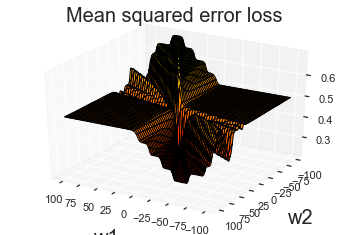

In [130]:
ax = prepare_axes()
plt.title("Mean squared error loss", fontsize=20)
view_range = 100    # Wide range to see the creeks and valleys
W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
                     np.linspace(-view_range, view_range, MESH_SIZE))
losses = np.array([losstest(X, Y_binary, [w1, w2]) for w1, w2 in
                   zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black', vmax=np.max(L), antialiased=True)
plt.show()

Plot logarithmic loss

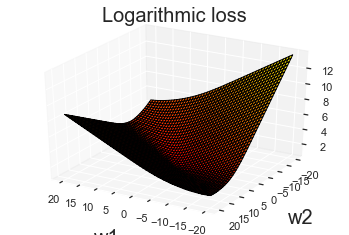

In [131]:
ax = prepare_axes()
plt.title("Logarithmic loss", fontsize=20)
view_range = 20    # Tight range to avoid overflows
W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
                     np.linspace(-view_range, view_range, MESH_SIZE))
losses = np.array([log_losstest(X, Y_binary, [w1, w2]) for w1, w2 in
                   zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black', vmax=np.max(L), antialiased=True)
plt.show()

### Gradient

In [132]:
def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]

### Train/Test

In [133]:
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w


def test(X, Y, w):
    total_examples = X.shape[0]
    correct_results = np.sum(classify(X, w) == Y)
    success_percent = correct_results * 100 / total_examples
    print("\nSuccess: %d/%d (%.2f%%)" %
          (correct_results, total_examples, success_percent))

### Results

In [134]:
# Prepare data
X = np.column_stack((np.ones(X_train.shape[0]), X_train))
Y = Y_train.reshape(-1, 1)
w = train(X, Y, iterations=10000, lr=0.0000019)

# Test it
test(X, Y, w)

Iteration    0 => Loss: 0.69314718055994528623
Iteration    1 => Loss: 0.69253561719820933007
Iteration    2 => Loss: 0.69170519994002388486
Iteration    3 => Loss: 0.69123798484957388322
Iteration    4 => Loss: 0.69063257555079970995
Iteration    5 => Loss: 0.69027151166997746667
Iteration    6 => Loss: 0.68982337084757006096
Iteration    7 => Loss: 0.68954199831294649137
Iteration    8 => Loss: 0.68920616380575039361
Iteration    9 => Loss: 0.68898549899648675598
Iteration   10 => Loss: 0.68873123163761906795
Iteration   11 => Loss: 0.68855729730742554207
Iteration   12 => Loss: 0.68836307996064316495
Iteration   13 => Loss: 0.68822538717035597333
Iteration   14 => Loss: 0.68807586860885150415
Iteration   15 => Loss: 0.68796643591218686886
Iteration   16 => Loss: 0.68785049303558942757
Iteration   17 => Loss: 0.68776318538192582341
Iteration   18 => Loss: 0.68767265580158420946
Iteration   19 => Loss: 0.68760272288513846206
Iteration   20 => Loss: 0.68753155386878728184
Iteration   2

Iteration  177 => Loss: 0.68664880728013411026
Iteration  178 => Loss: 0.68664714309594210295
Iteration  179 => Loss: 0.68664547963742195158
Iteration  180 => Loss: 0.68664381688163234063
Iteration  181 => Loss: 0.68664215480653090218
Iteration  182 => Loss: 0.68664049339094146429
Iteration  183 => Loss: 0.68663883261451796880
Iteration  184 => Loss: 0.68663717245771338504
Iteration  185 => Loss: 0.68663551290174729136
Iteration  186 => Loss: 0.68663385392857601008
Iteration  187 => Loss: 0.68663219552086396380
Iteration  188 => Loss: 0.68663053766195603078
Iteration  189 => Loss: 0.68662888033584990044
Iteration  190 => Loss: 0.68662722352717120433
Iteration  191 => Loss: 0.68662556722114909125
Iteration  192 => Loss: 0.68662391140359146924
Iteration  193 => Loss: 0.68662225606086324525
Iteration  194 => Loss: 0.68662060117986412067
Iteration  195 => Loss: 0.68661894674800760807
Iteration  196 => Loss: 0.68661729275320082522
Iteration  197 => Loss: 0.68661563918382495508
Iteration  19

Iteration  357 => Loss: 0.68635382219868812381
Iteration  358 => Loss: 0.68635219815536974153
Iteration  359 => Loss: 0.68635057425162127043
Iteration  360 => Loss: 0.68634895048741118018
Iteration  361 => Loss: 0.68634732686270882862
Iteration  362 => Loss: 0.68634570337748457280
Iteration  363 => Loss: 0.68634408003170932489
Iteration  364 => Loss: 0.68634245682535433009
Iteration  365 => Loss: 0.68634083375839138874
Iteration  366 => Loss: 0.68633921083079296732
Iteration  367 => Loss: 0.68633758804253219843
Iteration  368 => Loss: 0.68633596539358243671
Iteration  369 => Loss: 0.68633434288391803602
Iteration  370 => Loss: 0.68633272051351290610
Iteration  371 => Loss: 0.68633109828234251104
Iteration  372 => Loss: 0.68632947619038175979
Iteration  373 => Loss: 0.68632785423760667154
Iteration  374 => Loss: 0.68632623242399315444
Iteration  375 => Loss: 0.68632461074951800484
Iteration  376 => Loss: 0.68632298921415790804
Iteration  377 => Loss: 0.68632136781789021551
Iteration  37

Iteration  532 => Loss: 0.68607172225897239404
Iteration  533 => Loss: 0.68607012236170539232
Iteration  534 => Loss: 0.68606852260112916042
Iteration  535 => Loss: 0.68606692297723026464
Iteration  536 => Loss: 0.68606532348999460513
Iteration  537 => Loss: 0.68606372413940841515
Iteration  538 => Loss: 0.68606212492545826098
Iteration  539 => Loss: 0.68606052584813004280
Iteration  540 => Loss: 0.68605892690741010487
Iteration  541 => Loss: 0.68605732810328468041
Iteration  542 => Loss: 0.68605572943574022471
Iteration  543 => Loss: 0.68605413090476252691
Iteration  544 => Loss: 0.68605253251033804229
Iteration  545 => Loss: 0.68605093425245333716
Iteration  546 => Loss: 0.68604933613109420065
Iteration  547 => Loss: 0.68604773814624708805
Iteration  548 => Loss: 0.68604614029789823260
Iteration  549 => Loss: 0.68604454258603397854
Iteration  550 => Loss: 0.68604294501064055911
Iteration  551 => Loss: 0.68604134757170409653
Iteration  552 => Loss: 0.68603975026921104607
Iteration  55

Iteration  709 => Loss: 0.68579065712599551752
Iteration  710 => Loss: 0.68578908121077375437
Iteration  711 => Loss: 0.68578750542984368010
Iteration  712 => Loss: 0.68578592978319219409
Iteration  713 => Loss: 0.68578435427080564057
Iteration  714 => Loss: 0.68578277889267080791
Iteration  715 => Loss: 0.68578120364877448445
Iteration  716 => Loss: 0.68577962853910323648
Iteration  717 => Loss: 0.68577805356364374134
Iteration  718 => Loss: 0.68577647872238256532
Iteration  719 => Loss: 0.68577490401530660780
Iteration  720 => Loss: 0.68577332944240221302
Iteration  721 => Loss: 0.68577175500365639138
Iteration  722 => Loss: 0.68577018069905559816
Iteration  723 => Loss: 0.68576860652858684375
Iteration  724 => Loss: 0.68576703249223636139
Iteration  725 => Loss: 0.68576545858999093941
Iteration  726 => Loss: 0.68576388482183758821
Iteration  727 => Loss: 0.68576231118776276308
Iteration  728 => Loss: 0.68576073768775291928
Iteration  729 => Loss: 0.68575916432179528925
Iteration  73

Iteration  891 => Loss: 0.68550603938851628616
Iteration  892 => Loss: 0.68550448769684324546
Iteration  893 => Loss: 0.68550293613707036222
Iteration  894 => Loss: 0.68550138470918453582
Iteration  895 => Loss: 0.68549983341317322072
Iteration  896 => Loss: 0.68549828224902331630
Iteration  897 => Loss: 0.68549673121672161091
Iteration  898 => Loss: 0.68549518031625555903
Iteration  899 => Loss: 0.68549362954761217104
Iteration  900 => Loss: 0.68549207891077812427
Iteration  901 => Loss: 0.68549052840574098422
Iteration  902 => Loss: 0.68548897803248765026
Iteration  903 => Loss: 0.68548742779100513278
Iteration  904 => Loss: 0.68548587768128055320
Iteration  905 => Loss: 0.68548432770330103292
Iteration  906 => Loss: 0.68548277785705358234
Iteration  907 => Loss: 0.68548122814252543389
Iteration  908 => Loss: 0.68547967855970348694
Iteration  909 => Loss: 0.68547812910857486290
Iteration  910 => Loss: 0.68547657978912701626
Iteration  911 => Loss: 0.68547503060134629127
Iteration  91

Iteration 1066 => Loss: 0.68523649024458721524
Iteration 1067 => Loss: 0.68523496144028173127
Iteration 1068 => Loss: 0.68523343276564363524
Iteration 1069 => Loss: 0.68523190422066071470
Iteration 1070 => Loss: 0.68523037580532020208
Iteration 1071 => Loss: 0.68522884751960966287
Iteration 1072 => Loss: 0.68522731936351621851
Iteration 1073 => Loss: 0.68522579133702743448
Iteration 1074 => Loss: 0.68522426344013087629
Iteration 1075 => Loss: 0.68522273567281388740
Iteration 1076 => Loss: 0.68522120803506392228
Iteration 1077 => Loss: 0.68521968052686832440
Iteration 1078 => Loss: 0.68521815314821477028
Iteration 1079 => Loss: 0.68521662589909038132
Iteration 1080 => Loss: 0.68521509877948294509
Iteration 1081 => Loss: 0.68521357178937958299
Iteration 1082 => Loss: 0.68521204492876808256
Iteration 1083 => Loss: 0.68521051819763556523
Iteration 1084 => Loss: 0.68520899159596959649
Iteration 1085 => Loss: 0.68520746512375774184
Iteration 1086 => Loss: 0.68520593878098745577
Iteration 108

Iteration 1243 => Loss: 0.68496790023552123206
Iteration 1244 => Loss: 0.68496639418827287571
Iteration 1245 => Loss: 0.68496488826849633025
Iteration 1246 => Loss: 0.68496338247617982731
Iteration 1247 => Loss: 0.68496187681131082137
Iteration 1248 => Loss: 0.68496037127387732202
Iteration 1249 => Loss: 0.68495886586386678374
Iteration 1250 => Loss: 0.68495736058126732715
Iteration 1251 => Loss: 0.68495585542606651774
Iteration 1252 => Loss: 0.68495435039825225410
Iteration 1253 => Loss: 0.68495284549781221273
Iteration 1254 => Loss: 0.68495134072473429221
Iteration 1255 => Loss: 0.68494983607900616907
Iteration 1256 => Loss: 0.68494833156061563084
Iteration 1257 => Loss: 0.68494682716955057611
Iteration 1258 => Loss: 0.68494532290579868139
Iteration 1259 => Loss: 0.68494381876934795628
Iteration 1260 => Loss: 0.68494231476018563320
Iteration 1261 => Loss: 0.68494081087830016585
Iteration 1262 => Loss: 0.68493930712367900870
Iteration 1263 => Loss: 0.68493780349631006032
Iteration 126

Iteration 1418 => Loss: 0.68470627205998835230
Iteration 1419 => Loss: 0.68470478813574575661
Iteration 1420 => Loss: 0.68470330433686288352
Iteration 1421 => Loss: 0.68470182066332752058
Iteration 1422 => Loss: 0.68470033711512801045
Iteration 1423 => Loss: 0.68469885369225225169
Iteration 1424 => Loss: 0.68469737039468836493
Iteration 1425 => Loss: 0.68469588722242458179
Iteration 1426 => Loss: 0.68469440417544880084
Iteration 1427 => Loss: 0.68469292125374936475
Iteration 1428 => Loss: 0.68469143845731417208
Iteration 1429 => Loss: 0.68468995578613134345
Iteration 1430 => Loss: 0.68468847324018899947
Iteration 1431 => Loss: 0.68468699081947537177
Iteration 1432 => Loss: 0.68468550852397846995
Iteration 1433 => Loss: 0.68468402635368619258
Iteration 1434 => Loss: 0.68468254430858699333
Iteration 1435 => Loss: 0.68468106238866899282
Iteration 1436 => Loss: 0.68467958059391997860
Iteration 1437 => Loss: 0.68467809892432829333
Iteration 1438 => Loss: 0.68467661737988194659
Iteration 143

Iteration 1597 => Loss: 0.68444263559966722621
Iteration 1598 => Loss: 0.68444117392665770883
Iteration 1599 => Loss: 0.68443971237690337528
Iteration 1600 => Loss: 0.68443825095039234618
Iteration 1601 => Loss: 0.68443678964711329726
Iteration 1602 => Loss: 0.68443532846705434913
Iteration 1603 => Loss: 0.68443386741020406649
Iteration 1604 => Loss: 0.68443240647655079201
Iteration 1605 => Loss: 0.68443094566608297935
Iteration 1606 => Loss: 0.68442948497878897118
Iteration 1607 => Loss: 0.68442802441465733221
Iteration 1608 => Loss: 0.68442656397367618304
Iteration 1609 => Loss: 0.68442510365583419940
Iteration 1610 => Loss: 0.68442364346111961293
Iteration 1611 => Loss: 0.68442218338952098833
Iteration 1612 => Loss: 0.68442072344102677928
Iteration 1613 => Loss: 0.68441926361562510639
Iteration 1614 => Loss: 0.68441780391330475641
Iteration 1615 => Loss: 0.68441634433405384996
Iteration 1616 => Loss: 0.68441488487786106276
Iteration 1617 => Loss: 0.68441342554471451542
Iteration 161

Iteration 1772 => Loss: 0.68418870925572849995
Iteration 1773 => Loss: 0.68418726897713466606
Iteration 1774 => Loss: 0.68418582881979017607
Iteration 1775 => Loss: 0.68418438878368381673
Iteration 1776 => Loss: 0.68418294886880437478
Iteration 1777 => Loss: 0.68418150907514019288
Iteration 1778 => Loss: 0.68418006940268016880
Iteration 1779 => Loss: 0.68417862985141320031
Iteration 1780 => Loss: 0.68417719042132763008
Iteration 1781 => Loss: 0.68417575111241224484
Iteration 1782 => Loss: 0.68417431192465583134
Iteration 1783 => Loss: 0.68417287285804695429
Iteration 1784 => Loss: 0.68417143391257440044
Iteration 1785 => Loss: 0.68416999508822695653
Iteration 1786 => Loss: 0.68416855638499318726
Iteration 1787 => Loss: 0.68416711780286165734
Iteration 1788 => Loss: 0.68416567934182126454
Iteration 1789 => Loss: 0.68416424100186079560
Iteration 1790 => Loss: 0.68416280278296881523
Iteration 1791 => Loss: 0.68416136468513388813
Iteration 1792 => Loss: 0.68415992670834513412
Iteration 179

Iteration 1953 => Loss: 0.68392998304938423804
Iteration 1954 => Loss: 0.68392856453406747352
Iteration 1955 => Loss: 0.68392714613797689349
Iteration 1956 => Loss: 0.68392572786110117367
Iteration 1957 => Loss: 0.68392430970342932284
Iteration 1958 => Loss: 0.68392289166495046082
Iteration 1959 => Loss: 0.68392147374565359641
Iteration 1960 => Loss: 0.68392005594552729431
Iteration 1961 => Loss: 0.68391863826456067432
Iteration 1962 => Loss: 0.68391722070274307832
Iteration 1963 => Loss: 0.68391580326006307100
Iteration 1964 => Loss: 0.68391438593650966116
Iteration 1965 => Loss: 0.68391296873207196860
Iteration 1966 => Loss: 0.68391155164673900213
Iteration 1967 => Loss: 0.68391013468049954849
Iteration 1968 => Loss: 0.68390871783334272749
Iteration 1969 => Loss: 0.68390730110525743690
Iteration 1970 => Loss: 0.68390588449623268552
Iteration 1971 => Loss: 0.68390446800625748214
Iteration 1972 => Loss: 0.68390305163532083554
Iteration 1973 => Loss: 0.68390163538341164351
Iteration 197

Iteration 2129 => Loss: 0.68368215062973303198
Iteration 2130 => Loss: 0.68368075292948504718
Iteration 2131 => Loss: 0.68367935534654267205
Iteration 2132 => Loss: 0.68367795788089491538
Iteration 2133 => Loss: 0.68367656053253100801
Iteration 2134 => Loss: 0.68367516330144029180
Iteration 2135 => Loss: 0.68367376618761199758
Iteration 2136 => Loss: 0.68367236919103513415
Iteration 2137 => Loss: 0.68367097231169904337
Iteration 2138 => Loss: 0.68366957554959306709
Iteration 2139 => Loss: 0.68366817890470632513
Iteration 2140 => Loss: 0.68366678237702804832
Iteration 2141 => Loss: 0.68366538596654757853
Iteration 2142 => Loss: 0.68366398967325381353
Iteration 2143 => Loss: 0.68366259349713631721
Iteration 2144 => Loss: 0.68366119743818420940
Iteration 2145 => Loss: 0.68365980149638672092
Iteration 2146 => Loss: 0.68365840567173308262
Iteration 2147 => Loss: 0.68365700996421274738
Iteration 2148 => Loss: 0.68365561437381439092
Iteration 2149 => Loss: 0.68365421890052779919
Iteration 215

Iteration 2305 => Loss: 0.68343795231210269225
Iteration 2306 => Loss: 0.68343657509279032158
Iteration 2307 => Loss: 0.68343519798890695061
Iteration 2308 => Loss: 0.68343382100044181016
Iteration 2309 => Loss: 0.68343244412738468618
Iteration 2310 => Loss: 0.68343106736972469850
Iteration 2311 => Loss: 0.68342969072745152204
Iteration 2312 => Loss: 0.68342831420055438763
Iteration 2313 => Loss: 0.68342693778902308122
Iteration 2314 => Loss: 0.68342556149284694467
Iteration 2315 => Loss: 0.68342418531201531984
Iteration 2316 => Loss: 0.68342280924651799268
Iteration 2317 => Loss: 0.68342143329634397197
Iteration 2318 => Loss: 0.68342005746148315470
Iteration 2319 => Loss: 0.68341868174192466068
Iteration 2320 => Loss: 0.68341730613765816482
Iteration 2321 => Loss: 0.68341593064867312002
Iteration 2322 => Loss: 0.68341455527495909017
Iteration 2323 => Loss: 0.68341318001650519509
Iteration 2324 => Loss: 0.68341180487330166482
Iteration 2325 => Loss: 0.68341042984533717508
Iteration 232

Iteration 2486 => Loss: 0.68319054576540894086
Iteration 2487 => Loss: 0.68318918926830607408
Iteration 2488 => Loss: 0.68318783288474582704
Iteration 2489 => Loss: 0.68318647661471765264
Iteration 2490 => Loss: 0.68318512045821155887
Iteration 2491 => Loss: 0.68318376441521710962
Iteration 2492 => Loss: 0.68318240848572409085
Iteration 2493 => Loss: 0.68318105266972184442
Iteration 2494 => Loss: 0.68317969696720060035
Iteration 2495 => Loss: 0.68317834137814958950
Iteration 2496 => Loss: 0.68317698590255893087
Iteration 2497 => Loss: 0.68317563054041796633
Iteration 2498 => Loss: 0.68317427529171670386
Iteration 2499 => Loss: 0.68317292015644448533
Iteration 2500 => Loss: 0.68317156513459142975
Iteration 2501 => Loss: 0.68317021022614710102
Iteration 2502 => Loss: 0.68316885543110106305
Iteration 2503 => Loss: 0.68316750074944321280
Iteration 2504 => Loss: 0.68316614618116344726
Iteration 2505 => Loss: 0.68316479172625088623
Iteration 2506 => Loss: 0.68316343738469564872
Iteration 250

Iteration 2668 => Loss: 0.68294552332566893504
Iteration 2669 => Loss: 0.68294418732485373535
Iteration 2670 => Loss: 0.68294285143572674990
Iteration 2671 => Loss: 0.68294151565827765360
Iteration 2672 => Loss: 0.68294017999249645445
Iteration 2673 => Loss: 0.68293884443837327147
Iteration 2674 => Loss: 0.68293750899589800163
Iteration 2675 => Loss: 0.68293617366506009780
Iteration 2676 => Loss: 0.68293483844585023412
Iteration 2677 => Loss: 0.68293350333825775245
Iteration 2678 => Loss: 0.68293216834227288281
Iteration 2679 => Loss: 0.68293083345788552219
Iteration 2680 => Loss: 0.68292949868508545652
Iteration 2681 => Loss: 0.68292816402386280483
Iteration 2682 => Loss: 0.68292682947420746409
Iteration 2683 => Loss: 0.68292549503610922024
Iteration 2684 => Loss: 0.68292416070955819229
Iteration 2685 => Loss: 0.68292282649454427723
Iteration 2686 => Loss: 0.68292149239105726100
Iteration 2687 => Loss: 0.68292015839908737362
Iteration 2688 => Loss: 0.68291882451862429004
Iteration 268

Iteration 2849 => Loss: 0.68270551683625346762
Iteration 2850 => Loss: 0.68270420088802297176
Iteration 2851 => Loss: 0.68270288504967635568
Iteration 2852 => Loss: 0.68270156932120384941
Iteration 2853 => Loss: 0.68270025370259557196
Iteration 2854 => Loss: 0.68269893819384175337
Iteration 2855 => Loss: 0.68269762279493240165
Iteration 2856 => Loss: 0.68269630750585774681
Iteration 2857 => Loss: 0.68269499232660801891
Iteration 2858 => Loss: 0.68269367725717300388
Iteration 2859 => Loss: 0.68269236229754337586
Iteration 2860 => Loss: 0.68269104744770880977
Iteration 2861 => Loss: 0.68268973270765975769
Iteration 2862 => Loss: 0.68268841807738622762
Iteration 2863 => Loss: 0.68268710355687844960
Iteration 2864 => Loss: 0.68268578914612654263
Iteration 2865 => Loss: 0.68268447484512073675
Iteration 2866 => Loss: 0.68268316065385103997
Iteration 2867 => Loss: 0.68268184657230768231
Iteration 2868 => Loss: 0.68268053260048078279
Iteration 2869 => Loss: 0.68267921873836057145
Iteration 287

Iteration 3023 => Loss: 0.68247818724185027595
Iteration 3024 => Loss: 0.68247689026602098572
Iteration 3025 => Loss: 0.68247559339837760017
Iteration 3026 => Loss: 0.68247429663891012730
Iteration 3027 => Loss: 0.68247299998760890816
Iteration 3028 => Loss: 0.68247170344446428381
Iteration 3029 => Loss: 0.68247040700946659531
Iteration 3030 => Loss: 0.68246911068260640576
Iteration 3031 => Loss: 0.68246781446387361214
Iteration 3032 => Loss: 0.68246651835325911062
Iteration 3033 => Loss: 0.68246522235075268714
Iteration 3034 => Loss: 0.68246392645634512686
Iteration 3035 => Loss: 0.68246263067002665981
Iteration 3036 => Loss: 0.68246133499178740500
Iteration 3037 => Loss: 0.68246003942161814759
Iteration 3038 => Loss: 0.68245874395950878455
Iteration 3039 => Loss: 0.68245744860544987898
Iteration 3040 => Loss: 0.68245615335943177193
Iteration 3041 => Loss: 0.68245485822144469346
Iteration 3042 => Loss: 0.68245356319147942870
Iteration 3043 => Loss: 0.68245226826952609667
Iteration 304

Iteration 3199 => Loss: 0.68225157696738158997
Iteration 3200 => Loss: 0.68225029888441823811
Iteration 3201 => Loss: 0.68224902090795702669
Iteration 3202 => Loss: 0.68224774303798862984
Iteration 3203 => Loss: 0.68224646527450327760
Iteration 3204 => Loss: 0.68224518761749175511
Iteration 3205 => Loss: 0.68224391006694440343
Iteration 3206 => Loss: 0.68224263262285189668
Iteration 3207 => Loss: 0.68224135528520446492
Iteration 3208 => Loss: 0.68224007805399311533
Iteration 3209 => Loss: 0.68223880092920829998
Iteration 3210 => Loss: 0.68223752391084013791
Iteration 3211 => Loss: 0.68223624699887974732
Iteration 3212 => Loss: 0.68223497019331713620
Iteration 3213 => Loss: 0.68223369349414320073
Iteration 3214 => Loss: 0.68223241690134828197
Iteration 3215 => Loss: 0.68223114041492305404
Iteration 3216 => Loss: 0.68222986403485808005
Iteration 3217 => Loss: 0.68222858776114370105
Iteration 3218 => Loss: 0.68222731159377070220
Iteration 3219 => Loss: 0.68222603553272964660
Iteration 322

Iteration 3376 => Loss: 0.68202700659820125750
Iteration 3377 => Loss: 0.68202574721958408865
Iteration 3378 => Loss: 0.68202448794580983193
Iteration 3379 => Loss: 0.68202322877686849534
Iteration 3380 => Loss: 0.68202196971275153015
Iteration 3381 => Loss: 0.68202071075344883333
Iteration 3382 => Loss: 0.68201945189895174515
Iteration 3383 => Loss: 0.68201819314925082871
Iteration 3384 => Loss: 0.68201693450433653609
Iteration 3385 => Loss: 0.68201567596419998551
Iteration 3386 => Loss: 0.68201441752883162906
Iteration 3387 => Loss: 0.68201315919822236289
Iteration 3388 => Loss: 0.68201190097236286114
Iteration 3389 => Loss: 0.68201064285124368691
Iteration 3390 => Loss: 0.68200938483485562536
Iteration 3391 => Loss: 0.68200812692318968367
Iteration 3392 => Loss: 0.68200686911623642494
Iteration 3393 => Loss: 0.68200561141398641229
Iteration 3394 => Loss: 0.68200435381643043087
Iteration 3395 => Loss: 0.68200309632355948786
Iteration 3396 => Loss: 0.68200183893536403534
Iteration 339

Iteration 3556 => Loss: 0.68180199862966617275
Iteration 3557 => Loss: 0.68180075797411998639
Iteration 3558 => Loss: 0.68179951742176159168
Iteration 3559 => Loss: 0.68179827697258199581
Iteration 3560 => Loss: 0.68179703662657209495
Iteration 3561 => Loss: 0.68179579638372267425
Iteration 3562 => Loss: 0.68179455624402474090
Iteration 3563 => Loss: 0.68179331620746896903
Iteration 3564 => Loss: 0.68179207627404658787
Iteration 3565 => Loss: 0.68179083644374838258
Iteration 3566 => Loss: 0.68178959671656536035
Iteration 3567 => Loss: 0.68178835709248819530
Iteration 3568 => Loss: 0.68178711757150789463
Iteration 3569 => Loss: 0.68178587815361535451
Iteration 3570 => Loss: 0.68178463883880136009
Iteration 3571 => Loss: 0.68178339962705714061
Iteration 3572 => Loss: 0.68178216051837337019
Iteration 3573 => Loss: 0.68178092151274105603
Iteration 3574 => Loss: 0.68177968261015109430
Iteration 3575 => Loss: 0.68177844381059438117
Iteration 3576 => Loss: 0.68177720511406181281
Iteration 357

Iteration 3733 => Loss: 0.68158400162062038330
Iteration 3734 => Loss: 0.68158277908844056014
Iteration 3735 => Loss: 0.68158155665785291610
Iteration 3736 => Loss: 0.68158033432884823632
Iteration 3737 => Loss: 0.68157911210141786107
Iteration 3738 => Loss: 0.68157788997555257549
Iteration 3739 => Loss: 0.68157666795124360881
Iteration 3740 => Loss: 0.68157544602848196824
Iteration 3741 => Loss: 0.68157422420725877199
Iteration 3742 => Loss: 0.68157300248756524930
Iteration 3743 => Loss: 0.68157178086939207429
Iteration 3744 => Loss: 0.68157055935273092029
Iteration 3745 => Loss: 0.68156933793757223938
Iteration 3746 => Loss: 0.68156811662390726081
Iteration 3747 => Loss: 0.68156689541172754687
Iteration 3748 => Loss: 0.68156567430102354965
Iteration 3749 => Loss: 0.68156445329178694248
Iteration 3750 => Loss: 0.68156323238400817743
Iteration 3751 => Loss: 0.68156201157767881682
Iteration 3752 => Loss: 0.68156079087278975681
Iteration 3753 => Loss: 0.68155957026933189358
Iteration 375

Iteration 3909 => Loss: 0.68137039253404318995
Iteration 3910 => Loss: 0.68136918774537613697
Iteration 3911 => Loss: 0.68136798305674362020
Iteration 3912 => Loss: 0.68136677846813731296
Iteration 3913 => Loss: 0.68136557397954822246
Iteration 3914 => Loss: 0.68136436959096768895
Iteration 3915 => Loss: 0.68136316530238683065
Iteration 3916 => Loss: 0.68136196111379698781
Iteration 3917 => Loss: 0.68136075702518927866
Iteration 3918 => Loss: 0.68135955303655515447
Iteration 3919 => Loss: 0.68135834914788573347
Iteration 3920 => Loss: 0.68135714535917224488
Iteration 3921 => Loss: 0.68135594167040591795
Iteration 3922 => Loss: 0.68135473808157798192
Iteration 3923 => Loss: 0.68135353459267977705
Iteration 3924 => Loss: 0.68135233120370253257
Iteration 3925 => Loss: 0.68135112791463736670
Iteration 3926 => Loss: 0.68134992472547573072
Iteration 3927 => Loss: 0.68134872163620863184
Iteration 3928 => Loss: 0.68134751864682763234
Iteration 3929 => Loss: 0.68134631575732351738
Iteration 393

Iteration 4083 => Loss: 0.68116225739961011598
Iteration 4084 => Loss: 0.68116106988585800597
Iteration 4085 => Loss: 0.68115988247062919658
Iteration 4086 => Loss: 0.68115869515391513911
Iteration 4087 => Loss: 0.68115750793570695176
Iteration 4088 => Loss: 0.68115632081599641889
Iteration 4089 => Loss: 0.68115513379477499178
Iteration 4090 => Loss: 0.68115394687203367763
Iteration 4091 => Loss: 0.68115276004776403873
Iteration 4092 => Loss: 0.68115157332195741535
Iteration 4093 => Loss: 0.68115038669460514775
Iteration 4094 => Loss: 0.68114920016569913130
Iteration 4095 => Loss: 0.68114801373523004013
Iteration 4096 => Loss: 0.68114682740318988063
Iteration 4097 => Loss: 0.68114564116956966000
Iteration 4098 => Loss: 0.68114445503436094054
Iteration 4099 => Loss: 0.68114326899755517353
Iteration 4100 => Loss: 0.68114208305914358821
Iteration 4101 => Loss: 0.68114089721911785791
Iteration 4102 => Loss: 0.68113971147746910084
Iteration 4103 => Loss: 0.68113852583418887932
Iteration 410

Iteration 4264 => Loss: 0.68094891402686663628
Iteration 4265 => Loss: 0.68094774420646897450
Iteration 4266 => Loss: 0.68094657448305084824
Iteration 4267 => Loss: 0.68094540485660370877
Iteration 4268 => Loss: 0.68094423532711956248
Iteration 4269 => Loss: 0.68094306589458952761
Iteration 4270 => Loss: 0.68094189655900527747
Iteration 4271 => Loss: 0.68094072732035837436
Iteration 4272 => Loss: 0.68093955817864060265
Iteration 4273 => Loss: 0.68093838913384308054
Iteration 4274 => Loss: 0.68093722018595770340
Iteration 4275 => Loss: 0.68093605133497581150
Iteration 4276 => Loss: 0.68093488258088918919
Iteration 4277 => Loss: 0.68093371392368928774
Iteration 4278 => Loss: 0.68093254536336755844
Iteration 4279 => Loss: 0.68093137689991567463
Iteration 4280 => Loss: 0.68093020853332519859
Iteration 4281 => Loss: 0.68092904026358769265
Iteration 4282 => Loss: 0.68092787209069471910
Iteration 4283 => Loss: 0.68092670401463784025
Iteration 4284 => Loss: 0.68092553603540861840
Iteration 428

Iteration 4443 => Loss: 0.68074105325113154485
Iteration 4444 => Loss: 0.68073990065627509871
Iteration 4445 => Loss: 0.68073874815689960904
Iteration 4446 => Loss: 0.68073759575299630509
Iteration 4447 => Loss: 0.68073644344455741528
Iteration 4448 => Loss: 0.68073529123157394682
Iteration 4449 => Loss: 0.68073413911403823917
Iteration 4450 => Loss: 0.68073298709194163258
Iteration 4451 => Loss: 0.68073183516527591141
Iteration 4452 => Loss: 0.68073068333403286001
Iteration 4453 => Loss: 0.68072953159820415170
Iteration 4454 => Loss: 0.68072837995778145981
Iteration 4455 => Loss: 0.68072722841275645767
Iteration 4456 => Loss: 0.68072607696312104064
Iteration 4457 => Loss: 0.68072492560886666002
Iteration 4458 => Loss: 0.68072377434998521117
Iteration 4459 => Loss: 0.68072262318646847845
Iteration 4460 => Loss: 0.68072147211830791314
Iteration 4461 => Loss: 0.68072032114549529958
Iteration 4462 => Loss: 0.68071917026802264417
Iteration 4463 => Loss: 0.68071801948588128717
Iteration 446

Iteration 4618 => Loss: 0.68054079559062219396
Iteration 4619 => Loss: 0.68053965957927575747
Iteration 4620 => Loss: 0.68053852366197042922
Iteration 4621 => Loss: 0.68053738783869799356
Iteration 4622 => Loss: 0.68053625210945034585
Iteration 4623 => Loss: 0.68053511647421938147
Iteration 4624 => Loss: 0.68053398093299688476
Iteration 4625 => Loss: 0.68053284548577475110
Iteration 4626 => Loss: 0.68053171013254487587
Iteration 4627 => Loss: 0.68053057487329893238
Iteration 4628 => Loss: 0.68052943970802881601
Iteration 4629 => Loss: 0.68052830463672653316
Iteration 4630 => Loss: 0.68052716965938386817
Iteration 4631 => Loss: 0.68052603477599249437
Iteration 4632 => Loss: 0.68052489998654464021
Iteration 4633 => Loss: 0.68052376529103175695
Iteration 4634 => Loss: 0.68052263068944618407
Iteration 4635 => Loss: 0.68052149618177926182
Iteration 4636 => Loss: 0.68052036176802299661
Iteration 4637 => Loss: 0.68051922744816950583
Iteration 4638 => Loss: 0.68051809322221024079
Iteration 463

Iteration 4793 => Loss: 0.68034341825182775843
Iteration 4794 => Loss: 0.68034229857422945376
Iteration 4795 => Loss: 0.68034117898925761114
Iteration 4796 => Loss: 0.68034005949690390391
Iteration 4797 => Loss: 0.68033894009716044948
Iteration 4798 => Loss: 0.68033782079001947629
Iteration 4799 => Loss: 0.68033670157547243562
Iteration 4800 => Loss: 0.68033558245351188898
Iteration 4801 => Loss: 0.68033446342412939867
Iteration 4802 => Loss: 0.68033334448731719313
Iteration 4803 => Loss: 0.68033222564306705671
Iteration 4804 => Loss: 0.68033110689137132887
Iteration 4805 => Loss: 0.68032998823222157192
Iteration 4806 => Loss: 0.68032886966561012532
Iteration 4807 => Loss: 0.68032775119152877341
Iteration 4808 => Loss: 0.68032663280996963362
Iteration 4809 => Loss: 0.68032551452092460131
Iteration 4810 => Loss: 0.68032439632438568289
Iteration 4811 => Loss: 0.68032327822034510678
Iteration 4812 => Loss: 0.68032216020879454632
Iteration 4813 => Loss: 0.68032104228972622995
Iteration 481

Iteration 4971 => Loss: 0.68014556740588238970
Iteration 4972 => Loss: 0.68014446409022888407
Iteration 4973 => Loss: 0.68014336086578741636
Iteration 4974 => Loss: 0.68014225773254988194
Iteration 4975 => Loss: 0.68014115469050873131
Iteration 4976 => Loss: 0.68014005173965563777
Iteration 4977 => Loss: 0.68013894887998305183
Iteration 4978 => Loss: 0.68013784611148309089
Iteration 4979 => Loss: 0.68013674343414765033
Iteration 4980 => Loss: 0.68013564084796918063
Iteration 4981 => Loss: 0.68013453835293957717
Iteration 4982 => Loss: 0.68013343594905095735
Iteration 4983 => Loss: 0.68013233363629566064
Iteration 4984 => Loss: 0.68013123141466580446
Iteration 4985 => Loss: 0.68013012928415317315
Iteration 4986 => Loss: 0.68012902724475021721
Iteration 4987 => Loss: 0.68012792529644905404
Iteration 4988 => Loss: 0.68012682343924157902
Iteration 4989 => Loss: 0.68012572167312035365
Iteration 4990 => Loss: 0.68012461999807705126
Iteration 4991 => Loss: 0.68012351841410390030
Iteration 499

Iteration 5146 => Loss: 0.67995386898120113717
Iteration 5147 => Loss: 0.67995278150837734632
Iteration 5148 => Loss: 0.67995169412539835374
Iteration 5149 => Loss: 0.67995060683225672093
Iteration 5150 => Loss: 0.67994951962894467634
Iteration 5151 => Loss: 0.67994843251545444840
Iteration 5152 => Loss: 0.67994734549177804350
Iteration 5153 => Loss: 0.67994625855790824520
Iteration 5154 => Loss: 0.67994517171383683785
Iteration 5155 => Loss: 0.67994408495955627192
Iteration 5156 => Loss: 0.67994299829505877586
Iteration 5157 => Loss: 0.67994191172033668913
Iteration 5158 => Loss: 0.67994082523538201812
Iteration 5159 => Loss: 0.67993973884018732434
Iteration 5160 => Loss: 0.67993865253474483623
Iteration 5161 => Loss: 0.67993756631904667120
Iteration 5162 => Loss: 0.67993648019308505770
Iteration 5163 => Loss: 0.67993539415685255722
Iteration 5164 => Loss: 0.67993430821034106515
Iteration 5165 => Loss: 0.67993322235354314298
Iteration 5166 => Loss: 0.67993213658645090813
Iteration 516

Iteration 5327 => Loss: 0.67975849247964104105
Iteration 5328 => Loss: 0.67975742114331960675
Iteration 5329 => Loss: 0.67975634989545363762
Iteration 5330 => Loss: 0.67975527873603525109
Iteration 5331 => Loss: 0.67975420766505678660
Iteration 5332 => Loss: 0.67975313668251069465
Iteration 5333 => Loss: 0.67975206578838942573
Iteration 5334 => Loss: 0.67975099498268520826
Iteration 5335 => Loss: 0.67974992426539060375
Iteration 5336 => Loss: 0.67974885363649795167
Iteration 5337 => Loss: 0.67974778309599959147
Iteration 5338 => Loss: 0.67974671264388797365
Iteration 5339 => Loss: 0.67974564228015543765
Iteration 5340 => Loss: 0.67974457200479443397
Iteration 5341 => Loss: 0.67974350181779741309
Iteration 5342 => Loss: 0.67974243171915671446
Iteration 5343 => Loss: 0.67974136170886456654
Iteration 5344 => Loss: 0.67974029178691364184
Iteration 5345 => Loss: 0.67973922195329616880
Iteration 5346 => Loss: 0.67973815220800470893
Iteration 5347 => Loss: 0.67973708255103149067
Iteration 534

Iteration 5502 => Loss: 0.67957234869806304456
Iteration 5503 => Loss: 0.67957129272614291704
Iteration 5504 => Loss: 0.67957023684135686725
Iteration 5505 => Loss: 0.67956918104369756772
Iteration 5506 => Loss: 0.67956812533315702485
Iteration 5507 => Loss: 0.67956706970972835524
Iteration 5508 => Loss: 0.67956601417340367632
Iteration 5509 => Loss: 0.67956495872417566062
Iteration 5510 => Loss: 0.67956390336203675862
Iteration 5511 => Loss: 0.67956284808697964284
Iteration 5512 => Loss: 0.67956179289899654172
Iteration 5513 => Loss: 0.67956073779808012780
Iteration 5514 => Loss: 0.67955968278422307360
Iteration 5515 => Loss: 0.67955862785741760757
Iteration 5516 => Loss: 0.67955757301765651324
Iteration 5517 => Loss: 0.67955651826493201906
Iteration 5518 => Loss: 0.67955546359923690858
Iteration 5519 => Loss: 0.67955440902056363228
Iteration 5520 => Loss: 0.67955335452890486270
Iteration 5521 => Loss: 0.67955230012425271724
Iteration 5522 => Loss: 0.67955124580660020150
Iteration 552

Iteration 5677 => Loss: 0.67938887368129852184
Iteration 5678 => Loss: 0.67938783284446735422
Iteration 5679 => Loss: 0.67938679209347097032
Iteration 5680 => Loss: 0.67938575142830148756
Iteration 5681 => Loss: 0.67938471084895202257
Iteration 5682 => Loss: 0.67938367035541480377
Iteration 5683 => Loss: 0.67938262994768283676
Iteration 5684 => Loss: 0.67938158962574846100
Iteration 5685 => Loss: 0.67938054938960457108
Iteration 5686 => Loss: 0.67937950923924361746
Iteration 5687 => Loss: 0.67937846917465827268
Iteration 5688 => Loss: 0.67937742919584120926
Iteration 5689 => Loss: 0.67937638930278509974
Iteration 5690 => Loss: 0.67937534949548250562
Iteration 5691 => Loss: 0.67937430977392609943
Iteration 5692 => Loss: 0.67937327013810866472
Iteration 5693 => Loss: 0.67937223058802276299
Iteration 5694 => Loss: 0.67937119112366073370
Iteration 5695 => Loss: 0.67937015174501569348
Iteration 5696 => Loss: 0.67936911245207998178
Iteration 5697 => Loss: 0.67936807324484627113
Iteration 569

Iteration 5852 => Loss: 0.67920802762658949447
Iteration 5853 => Loss: 0.67920700169927739065
Iteration 5854 => Loss: 0.67920597585652120465
Iteration 5855 => Loss: 0.67920495009831405309
Iteration 5856 => Loss: 0.67920392442464849747
Iteration 5857 => Loss: 0.67920289883551743237
Iteration 5858 => Loss: 0.67920187333091353032
Iteration 5859 => Loss: 0.67920084791082946385
Iteration 5860 => Loss: 0.67919982257525823854
Iteration 5861 => Loss: 0.67919879732419230489
Iteration 5862 => Loss: 0.67919777215762444644
Iteration 5863 => Loss: 0.67919674707554789084
Iteration 5864 => Loss: 0.67919572207795475549
Iteration 5865 => Loss: 0.67919469716483826804
Iteration 5866 => Loss: 0.67919367233619099000
Iteration 5867 => Loss: 0.67919264759200581594
Iteration 5868 => Loss: 0.67919162293227530736
Iteration 5869 => Loss: 0.67919059835699224781
Iteration 5870 => Loss: 0.67918957386614953187
Iteration 5871 => Loss: 0.67918854945973994308
Iteration 5872 => Loss: 0.67918752513775604296
Iteration 587

Iteration 6032 => Loss: 0.67902471601267766488
Iteration 6033 => Loss: 0.67902370518938892641
Iteration 6034 => Loss: 0.67902269444936280696
Iteration 6035 => Loss: 0.67902168379259231212
Iteration 6036 => Loss: 0.67902067321907044750
Iteration 6037 => Loss: 0.67901966272878988562
Iteration 6038 => Loss: 0.67901865232174363207
Iteration 6039 => Loss: 0.67901764199792447041
Iteration 6040 => Loss: 0.67901663175732518418
Iteration 6041 => Loss: 0.67901562159993900103
Iteration 6042 => Loss: 0.67901461152575848246
Iteration 6043 => Loss: 0.67901360153477663406
Iteration 6044 => Loss: 0.67901259162698635041
Iteration 6045 => Loss: 0.67901158180238030404
Iteration 6046 => Loss: 0.67901057206095172258
Iteration 6047 => Loss: 0.67900956240269316755
Iteration 6048 => Loss: 0.67900855282759775555
Iteration 6049 => Loss: 0.67900754333565827014
Iteration 6050 => Loss: 0.67900653392686760590
Iteration 6051 => Loss: 0.67900552460121865739
Iteration 6052 => Loss: 0.67900451535870420816
Iteration 605

Iteration 6212 => Loss: 0.67884410240033787876
Iteration 6213 => Loss: 0.67884310645017797992
Iteration 6214 => Loss: 0.67884211058200871758
Iteration 6215 => Loss: 0.67884111479582331938
Iteration 6216 => Loss: 0.67884011909161434684
Iteration 6217 => Loss: 0.67883912346937524962
Iteration 6218 => Loss: 0.67883812792909881129
Iteration 6219 => Loss: 0.67883713247077770436
Iteration 6220 => Loss: 0.67883613709440548956
Iteration 6221 => Loss: 0.67883514179997495042
Iteration 6222 => Loss: 0.67883414658747887049
Iteration 6223 => Loss: 0.67883315145691069947
Iteration 6224 => Loss: 0.67883215640826288784
Iteration 6225 => Loss: 0.67883116144152877425
Iteration 6226 => Loss: 0.67883016655670136430
Iteration 6227 => Loss: 0.67882917175377344154
Iteration 6228 => Loss: 0.67882817703273823362
Iteration 6229 => Loss: 0.67882718239358874612
Iteration 6230 => Loss: 0.67882618783631776260
Iteration 6231 => Loss: 0.67882519336091839968
Iteration 6232 => Loss: 0.67882419896738366294
Iteration 623

Iteration 6393 => Loss: 0.67866516426542600193
Iteration 6394 => Loss: 0.67866418304203546263
Iteration 6395 => Loss: 0.67866320189937745511
Iteration 6396 => Loss: 0.67866222083744531801
Iteration 6397 => Loss: 0.67866123985623172388
Iteration 6398 => Loss: 0.67866025895573023341
Iteration 6399 => Loss: 0.67865927813593363016
Iteration 6400 => Loss: 0.67865829739683514177
Iteration 6401 => Loss: 0.67865731673842799587
Iteration 6402 => Loss: 0.67865633616070508705
Iteration 6403 => Loss: 0.67865535566365964293
Iteration 6404 => Loss: 0.67865437524728466911
Iteration 6405 => Loss: 0.67865339491157350427
Iteration 6406 => Loss: 0.67865241465651893193
Iteration 6407 => Loss: 0.67865143448211440180
Iteration 6408 => Loss: 0.67865045438835291947
Iteration 6409 => Loss: 0.67864947437522737950
Iteration 6410 => Loss: 0.67864849444273134260
Iteration 6411 => Loss: 0.67864751459085748131
Iteration 6412 => Loss: 0.67864653481959913428
Iteration 6413 => Loss: 0.67864555512894930711
Iteration 641

Iteration 6574 => Loss: 0.67848887129243340421
Iteration 6575 => Loss: 0.67848790456995611287
Iteration 6576 => Loss: 0.67848693792697389870
Iteration 6577 => Loss: 0.67848597136347987835
Iteration 6578 => Loss: 0.67848500487946750148
Iteration 6579 => Loss: 0.67848403847492977370
Iteration 6580 => Loss: 0.67848307214985992264
Iteration 6581 => Loss: 0.67848210590425150901
Iteration 6582 => Loss: 0.67848113973809731636
Iteration 6583 => Loss: 0.67848017365139079438
Iteration 6584 => Loss: 0.67847920764412505967
Iteration 6585 => Loss: 0.67847824171629333989
Iteration 6586 => Loss: 0.67847727586788908472
Iteration 6587 => Loss: 0.67847631009890518872
Iteration 6588 => Loss: 0.67847534440933510158
Iteration 6589 => Loss: 0.67847437879917216197
Iteration 6590 => Loss: 0.67847341326840915343
Iteration 6591 => Loss: 0.67847244781703963667
Iteration 6592 => Loss: 0.67847148244505695036
Iteration 6593 => Loss: 0.67847051715245387804
Iteration 6594 => Loss: 0.67846955193922420246
Iteration 659

Iteration 6757 => Loss: 0.67831327812561759139
Iteration 6758 => Loss: 0.67831232583843725781
Iteration 6759 => Loss: 0.67831137362952120817
Iteration 6760 => Loss: 0.67831042149886300319
Iteration 6761 => Loss: 0.67830946944645598151
Iteration 6762 => Loss: 0.67830851747229314874
Iteration 6763 => Loss: 0.67830756557636806559
Iteration 6764 => Loss: 0.67830661375867418172
Iteration 6765 => Loss: 0.67830566201920461378
Iteration 6766 => Loss: 0.67830471035795281143
Iteration 6767 => Loss: 0.67830375877491200232
Iteration 6768 => Loss: 0.67830280727007574715
Iteration 6769 => Loss: 0.67830185584343716254
Iteration 6770 => Loss: 0.67830090449498958716
Iteration 6771 => Loss: 0.67829995322472658170
Iteration 6772 => Loss: 0.67829900203264126279
Iteration 6773 => Loss: 0.67829805091872708012
Iteration 6774 => Loss: 0.67829709988297726131
Iteration 6775 => Loss: 0.67829614892538525606
Iteration 6776 => Loss: 0.67829519804594440302
Iteration 6777 => Loss: 0.67829424724464792984
Iteration 677

Iteration 6937 => Loss: 0.67814312092342499128
Iteration 6938 => Loss: 0.67814218261697178924
Iteration 6939 => Loss: 0.67814124438759237901
Iteration 6940 => Loss: 0.67814030623527987718
Iteration 6941 => Loss: 0.67813936816002806651
Iteration 6942 => Loss: 0.67813843016183006362
Iteration 6943 => Loss: 0.67813749224067942922
Iteration 6944 => Loss: 0.67813655439656950197
Iteration 6945 => Loss: 0.67813561662949384257
Iteration 6946 => Loss: 0.67813467893944601173
Iteration 6947 => Loss: 0.67813374132641934811
Iteration 6948 => Loss: 0.67813280379040707935
Iteration 6949 => Loss: 0.67813186633140298820
Iteration 6950 => Loss: 0.67813092894940019129
Iteration 6951 => Loss: 0.67812999164439247135
Iteration 6952 => Loss: 0.67812905441637305604
Iteration 6953 => Loss: 0.67812811726533539503
Iteration 6954 => Loss: 0.67812718019127304903
Iteration 6955 => Loss: 0.67812624319417935670
Iteration 6956 => Loss: 0.67812530627404787875
Iteration 6957 => Loss: 0.67812436943087184282
Iteration 695

Iteration 7112 => Loss: 0.67798008500100992446
Iteration 7113 => Loss: 0.67797916008305192381
Iteration 7114 => Loss: 0.67797823524102818205
Iteration 7115 => Loss: 0.67797731047493214884
Iteration 7116 => Loss: 0.67797638578475749593
Iteration 7117 => Loss: 0.67797546117049756198
Iteration 7118 => Loss: 0.67797453663214624076
Iteration 7119 => Loss: 0.67797361216969675990
Iteration 7120 => Loss: 0.67797268778314268012
Iteration 7121 => Loss: 0.67797176347247767314
Iteration 7122 => Loss: 0.67797083923769541070
Iteration 7123 => Loss: 0.67796991507878900940
Iteration 7124 => Loss: 0.67796899099575247405
Iteration 7125 => Loss: 0.67796806698857903228
Iteration 7126 => Loss: 0.67796714305726235583
Iteration 7127 => Loss: 0.67796621920179600540
Iteration 7128 => Loss: 0.67796529542217354170
Iteration 7129 => Loss: 0.67796437171838841440
Iteration 7130 => Loss: 0.67796344809043440627
Iteration 7131 => Loss: 0.67796252453830485596
Iteration 7132 => Loss: 0.67796160106199310214
Iteration 713

Iteration 7288 => Loss: 0.67781846308030946346
Iteration 7289 => Loss: 0.67781755142781574541
Iteration 7290 => Loss: 0.67781663985012841067
Iteration 7291 => Loss: 0.67781572834724079790
Iteration 7292 => Loss: 0.67781481691914680088
Iteration 7293 => Loss: 0.67781390556584009133
Iteration 7294 => Loss: 0.67781299428731389689
Iteration 7295 => Loss: 0.67781208308356233339
Iteration 7296 => Loss: 0.67781117195457885050
Iteration 7297 => Loss: 0.67781026090035700893
Iteration 7298 => Loss: 0.67780934992089070246
Iteration 7299 => Loss: 0.67780843901617326974
Iteration 7300 => Loss: 0.67780752818619860456
Iteration 7301 => Loss: 0.67780661743096015659
Iteration 7302 => Loss: 0.67780570675045170859
Iteration 7303 => Loss: 0.67780479614466693228
Iteration 7304 => Loss: 0.67780388561359938837
Iteration 7305 => Loss: 0.67780297515724252655
Iteration 7306 => Loss: 0.67780206477559068468
Iteration 7307 => Loss: 0.67780115446863675732
Iteration 7308 => Loss: 0.67780024423637474928
Iteration 730

Iteration 7470 => Loss: 0.67765376820101363986
Iteration 7471 => Loss: 0.67765287005908092510
Iteration 7472 => Loss: 0.67765197199080628998
Iteration 7473 => Loss: 0.67765107399618385031
Iteration 7474 => Loss: 0.67765017607520716680
Iteration 7475 => Loss: 0.67764927822787002221
Iteration 7476 => Loss: 0.67764838045416586620
Iteration 7477 => Loss: 0.67764748275408903666
Iteration 7478 => Loss: 0.67764658512763276121
Iteration 7479 => Loss: 0.67764568757479104466
Iteration 7480 => Loss: 0.67764479009555744771
Iteration 7481 => Loss: 0.67764389268992586413
Iteration 7482 => Loss: 0.67764299535789018769
Iteration 7483 => Loss: 0.67764209809944386809
Iteration 7484 => Loss: 0.67764120091458079909
Iteration 7485 => Loss: 0.67764030380329465242
Iteration 7486 => Loss: 0.67763940676557909981
Iteration 7487 => Loss: 0.67763850980142836811
Iteration 7488 => Loss: 0.67763761291083568494
Iteration 7489 => Loss: 0.67763671609379505512
Iteration 7490 => Loss: 0.67763581935030015035
Iteration 749

Iteration 7650 => Loss: 0.67749328333123637336
Iteration 7651 => Loss: 0.67749239834753427481
Iteration 7652 => Loss: 0.67749151343637314948
Iteration 7653 => Loss: 0.67749062859774711320
Iteration 7654 => Loss: 0.67748974383164983770
Iteration 7655 => Loss: 0.67748885913807510573
Iteration 7656 => Loss: 0.67748797451701681105
Iteration 7657 => Loss: 0.67748708996846884745
Iteration 7658 => Loss: 0.67748620549242499767
Iteration 7659 => Loss: 0.67748532108887915548
Iteration 7660 => Loss: 0.67748443675782510365
Iteration 7661 => Loss: 0.67748355249925673593
Iteration 7662 => Loss: 0.67748266831316783509
Iteration 7663 => Loss: 0.67748178419955240592
Iteration 7664 => Loss: 0.67748090015840412015
Iteration 7665 => Loss: 0.67748001618971698257
Iteration 7666 => Loss: 0.67747913229348466491
Iteration 7667 => Loss: 0.67747824846970106094
Iteration 7668 => Loss: 0.67747736471836028649
Iteration 7669 => Loss: 0.67747648103945579123
Iteration 7670 => Loss: 0.67747559743298169099
Iteration 767

Iteration 7825 => Loss: 0.67733951023604754837
Iteration 7826 => Loss: 0.67733863785377068645
Iteration 7827 => Loss: 0.67733776554296543093
Iteration 7828 => Loss: 0.67733689330362623071
Iteration 7829 => Loss: 0.67733602113574653547
Iteration 7830 => Loss: 0.67733514903932068307
Iteration 7831 => Loss: 0.67733427701434245627
Iteration 7832 => Loss: 0.67733340506080574883
Iteration 7833 => Loss: 0.67733253317870467658
Iteration 7834 => Loss: 0.67733166136803302226
Iteration 7835 => Loss: 0.67733078962878456863
Iteration 7836 => Loss: 0.67732991796095365356
Iteration 7837 => Loss: 0.67732904636453394875
Iteration 7838 => Loss: 0.67732817483951945903
Iteration 7839 => Loss: 0.67732730338590418917
Iteration 7840 => Loss: 0.67732643200368181091
Iteration 7841 => Loss: 0.67732556069284666211
Iteration 7842 => Loss: 0.67732468945339252553
Iteration 7843 => Loss: 0.67732381828531329493
Iteration 7844 => Loss: 0.67732294718860297511
Iteration 7845 => Loss: 0.67732207616325534882
Iteration 784

Iteration 8005 => Loss: 0.67718362706608159485
Iteration 8006 => Loss: 0.67718276745159045049
Iteration 8007 => Loss: 0.67718190790748866714
Iteration 8008 => Loss: 0.67718104843377024959
Iteration 8009 => Loss: 0.67718018903042898060
Iteration 8010 => Loss: 0.67717932969745919802
Iteration 8011 => Loss: 0.67717847043485479563
Iteration 8012 => Loss: 0.67717761124261011130
Iteration 8013 => Loss: 0.67717675212071859470
Iteration 8014 => Loss: 0.67717589306917458369
Iteration 8015 => Loss: 0.67717503408797208309
Iteration 8016 => Loss: 0.67717417517710543073
Iteration 8017 => Loss: 0.67717331633656829837
Iteration 8018 => Loss: 0.67717245756635469078
Iteration 8019 => Loss: 0.67717159886645894584
Iteration 8020 => Loss: 0.67717074023687506834
Iteration 8021 => Loss: 0.67716988167759661899
Iteration 8022 => Loss: 0.67716902318861815768
Iteration 8023 => Loss: 0.67716816476993368923
Iteration 8024 => Loss: 0.67716730642153710740
Iteration 8025 => Loss: 0.67716644814342241698
Iteration 802

Iteration 8182 => Loss: 0.67703256628401931039
Iteration 8183 => Loss: 0.67703171903597147985
Iteration 8184 => Loss: 0.67703087185726484876
Iteration 8185 => Loss: 0.67703002474789364395
Iteration 8186 => Loss: 0.67702917770785209228
Iteration 8187 => Loss: 0.67702833073713419854
Iteration 8188 => Loss: 0.67702748383573418955
Iteration 8189 => Loss: 0.67702663700364629218
Iteration 8190 => Loss: 0.67702579024086428916
Iteration 8191 => Loss: 0.67702494354738274041
Iteration 8192 => Loss: 0.67702409692319542867
Iteration 8193 => Loss: 0.67702325036829680283
Iteration 8194 => Loss: 0.67702240388268053461
Iteration 8195 => Loss: 0.67702155746634129496
Iteration 8196 => Loss: 0.67702071111927297764
Iteration 8197 => Loss: 0.67701986484146936540
Iteration 8198 => Loss: 0.67701901863292512918
Iteration 8199 => Loss: 0.67701817249363427376
Iteration 8200 => Loss: 0.67701732642359058190
Iteration 8201 => Loss: 0.67701648042278872452
Iteration 8202 => Loss: 0.67701563449122237337
Iteration 820

Iteration 8362 => Loss: 0.67688117313156526134
Iteration 8363 => Loss: 0.67688033827082139116
Iteration 8364 => Loss: 0.67687950347836967069
Iteration 8365 => Loss: 0.67687866875420443780
Iteration 8366 => Loss: 0.67687783409832014136
Iteration 8367 => Loss: 0.67687699951071067517
Iteration 8368 => Loss: 0.67687616499137037707
Iteration 8369 => Loss: 0.67687533054029347390
Iteration 8370 => Loss: 0.67687449615747419251
Iteration 8371 => Loss: 0.67687366184290675974
Iteration 8372 => Loss: 0.67687282759658540243
Iteration 8373 => Loss: 0.67687199341850434742
Iteration 8374 => Loss: 0.67687115930865771052
Iteration 8375 => Loss: 0.67687032526703982960
Iteration 8376 => Loss: 0.67686949129364493150
Iteration 8377 => Loss: 0.67686865738846713203
Iteration 8378 => Loss: 0.67686782355150076906
Iteration 8379 => Loss: 0.67686698978274018046
Iteration 8380 => Loss: 0.67686615608217925999
Iteration 8381 => Loss: 0.67686532244981245654
Iteration 8382 => Loss: 0.67686448888563388593
Iteration 838

Iteration 8537 => Loss: 0.67673610719442589545
Iteration 8538 => Loss: 0.67673528419724982008
Iteration 8539 => Loss: 0.67673446126736225281
Iteration 8540 => Loss: 0.67673363840475686537
Iteration 8541 => Loss: 0.67673281560942832868
Iteration 8542 => Loss: 0.67673199288137086960
Iteration 8543 => Loss: 0.67673117022057882597
Iteration 8544 => Loss: 0.67673034762704653566
Iteration 8545 => Loss: 0.67672952510076811450
Iteration 8546 => Loss: 0.67672870264173823340
Iteration 8547 => Loss: 0.67672788024995089717
Iteration 8548 => Loss: 0.67672705792540055469
Iteration 8549 => Loss: 0.67672623566808132178
Iteration 8550 => Loss: 0.67672541347798764733
Iteration 8551 => Loss: 0.67672459135511398021
Iteration 8552 => Loss: 0.67672376929945443624
Iteration 8553 => Loss: 0.67672294731100346432
Iteration 8554 => Loss: 0.67672212538975529128
Iteration 8555 => Loss: 0.67672130353570414396
Iteration 8556 => Loss: 0.67672048174884447125
Iteration 8557 => Loss: 0.67671966002917061100
Iteration 855

Iteration 8712 => Loss: 0.67659310217090407047
Iteration 8713 => Loss: 0.67659229086290817445
Iteration 8714 => Loss: 0.67659147962121168884
Iteration 8715 => Loss: 0.67659066844580884048
Iteration 8716 => Loss: 0.67658985733669441132
Iteration 8717 => Loss: 0.67658904629386218410
Iteration 8718 => Loss: 0.67658823531730694079
Iteration 8719 => Loss: 0.67658742440702313026
Iteration 8720 => Loss: 0.67658661356300486833
Iteration 8721 => Loss: 0.67658580278524682594
Iteration 8722 => Loss: 0.67658499207374311890
Iteration 8723 => Loss: 0.67658418142848852916
Iteration 8724 => Loss: 0.67658337084947706153
Iteration 8725 => Loss: 0.67658256033670327589
Iteration 8726 => Loss: 0.67658174989016173217
Iteration 8727 => Loss: 0.67658093950984643516
Iteration 8728 => Loss: 0.67658012919575216682
Iteration 8729 => Loss: 0.67657931894787315397
Iteration 8730 => Loss: 0.67657850876620384550
Iteration 8731 => Loss: 0.67657769865073869031
Iteration 8732 => Loss: 0.67657688860147191523
Iteration 873

Iteration 8892 => Loss: 0.67644812947514854073
Iteration 8893 => Loss: 0.67644733001117174354
Iteration 8894 => Loss: 0.67644653061249260251
Iteration 8895 => Loss: 0.67644573127910612165
Iteration 8896 => Loss: 0.67644493201100641677
Iteration 8897 => Loss: 0.67644413280818826983
Iteration 8898 => Loss: 0.67644333367064579665
Iteration 8899 => Loss: 0.67644253459837377918
Iteration 8900 => Loss: 0.67644173559136644425
Iteration 8901 => Loss: 0.67644093664961846279
Iteration 8902 => Loss: 0.67644013777312439473
Iteration 8903 => Loss: 0.67643933896187857790
Iteration 8904 => Loss: 0.67643854021587535019
Iteration 8905 => Loss: 0.67643774153510960456
Iteration 8906 => Loss: 0.67643694291957545683
Iteration 8907 => Loss: 0.67643614436926768896
Iteration 8908 => Loss: 0.67643534588418052778
Iteration 8909 => Loss: 0.67643454746430853319
Iteration 8910 => Loss: 0.67643374910964626512
Iteration 8911 => Loss: 0.67643295082018817244
Iteration 8912 => Loss: 0.67643215259592881505
Iteration 891

Iteration 9069 => Loss: 0.67630763643598701407
Iteration 9070 => Loss: 0.67630684844421118385
Iteration 9071 => Loss: 0.67630606051676400714
Iteration 9072 => Loss: 0.67630527265363982181
Iteration 9073 => Loss: 0.67630448485483340981
Iteration 9074 => Loss: 0.67630369712033899798
Iteration 9075 => Loss: 0.67630290945015136828
Iteration 9076 => Loss: 0.67630212184426508060
Iteration 9077 => Loss: 0.67630133430267458383
Iteration 9078 => Loss: 0.67630054682537454891
Iteration 9079 => Loss: 0.67629975941235953574
Iteration 9080 => Loss: 0.67629897206362421525
Iteration 9081 => Loss: 0.67629818477916292530
Iteration 9082 => Loss: 0.67629739755897033682
Iteration 9083 => Loss: 0.67629661040304112074
Iteration 9084 => Loss: 0.67629582331136972595
Iteration 9085 => Loss: 0.67629503628395082337
Iteration 9086 => Loss: 0.67629424932077886190
Iteration 9087 => Loss: 0.67629346242184840143
Iteration 9088 => Loss: 0.67629267558715422393
Iteration 9089 => Loss: 0.67629188881669066724
Iteration 909

Iteration 9249 => Loss: 0.67616682907327252394
Iteration 9250 => Loss: 0.67616605257352058178
Iteration 9251 => Loss: 0.67616527613712651412
Iteration 9252 => Loss: 0.67616449976408488087
Iteration 9253 => Loss: 0.67616372345439046398
Iteration 9254 => Loss: 0.67616294720803760132
Iteration 9255 => Loss: 0.67616217102502140790
Iteration 9256 => Loss: 0.67616139490533622158
Iteration 9257 => Loss: 0.67616061884897671330
Iteration 9258 => Loss: 0.67615984285593766501
Iteration 9259 => Loss: 0.67615906692621352558
Iteration 9260 => Loss: 0.67615829105979918801
Iteration 9261 => Loss: 0.67615751525668899014
Iteration 9262 => Loss: 0.67615673951687804699
Iteration 9263 => Loss: 0.67615596384036069644
Iteration 9264 => Loss: 0.67615518822713172042
Iteration 9265 => Loss: 0.67615441267718556784
Iteration 9266 => Loss: 0.67615363719051702063
Iteration 9267 => Loss: 0.67615286176712086075
Iteration 9268 => Loss: 0.67615208640699164810
Iteration 9269 => Loss: 0.67615131111012405363
Iteration 927

Iteration 9429 => Loss: 0.67602807471823223029
Iteration 9430 => Loss: 0.67602730953714307294
Iteration 9431 => Loss: 0.67602654441845622113
Iteration 9432 => Loss: 0.67602577936216656784
Iteration 9433 => Loss: 0.67602501436826867298
Iteration 9434 => Loss: 0.67602424943675709645
Iteration 9435 => Loss: 0.67602348456762684226
Iteration 9436 => Loss: 0.67602271976087235927
Iteration 9437 => Loss: 0.67602195501648876252
Iteration 9438 => Loss: 0.67602119033447061192
Iteration 9439 => Loss: 0.67602042571481257838
Iteration 9440 => Loss: 0.67601966115750944386
Iteration 9441 => Loss: 0.67601889666255599032
Iteration 9442 => Loss: 0.67601813222994666663
Iteration 9443 => Loss: 0.67601736785967669885
Iteration 9444 => Loss: 0.67601660355174053585
Iteration 9445 => Loss: 0.67601583930613284856
Iteration 9446 => Loss: 0.67601507512284875201
Iteration 9447 => Loss: 0.67601431100188258405
Iteration 9448 => Loss: 0.67601354694322923766
Iteration 9449 => Loss: 0.67601278294688338377
Iteration 945

Iteration 9618 => Loss: 0.67588455832237726018
Iteration 9619 => Loss: 0.67588380484225529798
Iteration 9620 => Loss: 0.67588305142354843102
Iteration 9621 => Loss: 0.67588229806625133023
Iteration 9622 => Loss: 0.67588154477035866652
Iteration 9623 => Loss: 0.67588079153586544390
Iteration 9624 => Loss: 0.67588003836276644432
Iteration 9625 => Loss: 0.67587928525105644972
Iteration 9626 => Loss: 0.67587853220073046412
Iteration 9627 => Loss: 0.67587777921178326945
Iteration 9628 => Loss: 0.67587702628420931461
Iteration 9629 => Loss: 0.67587627341800382563
Iteration 9630 => Loss: 0.67587552061316158447
Iteration 9631 => Loss: 0.67587476786967726206
Iteration 9632 => Loss: 0.67587401518754575136
Iteration 9633 => Loss: 0.67587326256676172331
Iteration 9634 => Loss: 0.67587251000732051498
Iteration 9635 => Loss: 0.67587175750921635320
Iteration 9636 => Loss: 0.67587100507244435299
Iteration 9637 => Loss: 0.67587025269699929630
Iteration 9638 => Loss: 0.67586950038287607612
Iteration 963

Iteration 9793 => Loss: 0.67575362981196418488
Iteration 9794 => Loss: 0.67575288700097380090
Iteration 9795 => Loss: 0.67575214425049845435
Iteration 9796 => Loss: 0.67575140156053314922
Iteration 9797 => Loss: 0.67575065893107300052
Iteration 9798 => Loss: 0.67574991636211234614
Iteration 9799 => Loss: 0.67574917385364674516
Iteration 9800 => Loss: 0.67574843140567053545
Iteration 9801 => Loss: 0.67574768901817883204
Iteration 9802 => Loss: 0.67574694669116652790
Iteration 9803 => Loss: 0.67574620442462851599
Iteration 9804 => Loss: 0.67574546221855980033
Iteration 9805 => Loss: 0.67574472007295527387
Iteration 9806 => Loss: 0.67574397798780960755
Iteration 9807 => Loss: 0.67574323596311780538
Iteration 9808 => Loss: 0.67574249399887498235
Iteration 9809 => Loss: 0.67574175209507569839
Iteration 9810 => Loss: 0.67574101025171517954
Iteration 9811 => Loss: 0.67574026846878809671
Iteration 9812 => Loss: 0.67573952674628956494
Iteration 9813 => Loss: 0.67573878508421425515
Iteration 981

Iteration 9971 => Loss: 0.67562235805236980912
Iteration 9972 => Loss: 0.67562162593309504910
Iteration 9973 => Loss: 0.67562089387343415847
Iteration 9974 => Loss: 0.67562016187338214124
Iteration 9975 => Loss: 0.67561942993293366833
Iteration 9976 => Loss: 0.67561869805208385475
Iteration 9977 => Loss: 0.67561796623082792657
Iteration 9978 => Loss: 0.67561723446916055469
Iteration 9979 => Loss: 0.67561650276707685414
Iteration 9980 => Loss: 0.67561577112457171790
Iteration 9981 => Loss: 0.67561503954164014996
Iteration 9982 => Loss: 0.67561430801827715431
Iteration 9983 => Loss: 0.67561357655447784598
Iteration 9984 => Loss: 0.67561284515023678487
Iteration 9985 => Loss: 0.67561211380554953010
Iteration 9986 => Loss: 0.67561138252041075258
Iteration 9987 => Loss: 0.67561065129481534530
Iteration 9988 => Loss: 0.67560992012875842327
Iteration 9989 => Loss: 0.67560918902223487947
Iteration 9990 => Loss: 0.67560845797523971790
Iteration 9991 => Loss: 0.67560772698776827561
Iteration 999

## Neural networks

### *Home made* neural network

In [135]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(logits):
    exponentials = np.exp(logits)
    return exponentials / np.sum(exponentials, axis=1).reshape(-1, 1)

def sigmoid_gradient(sigmoid):
    return np.multiply(sigmoid, (1 - sigmoid))

def loss(Y, y_hat):
    return -np.sum(Y * np.log(y_hat)) / Y.shape[0]

def prepend_bias(X):
    return np.insert(X, 0, 1, axis=1)

def forward(X, w1, w2):
    h = sigmoid(np.matmul(prepend_bias(X), w1))
    y_hat = softmax(np.matmul(prepend_bias(h), w2))
    return (y_hat, h)

def back(X, Y, y_hat, w2, h):
    w2_gradient = np.matmul(prepend_bias(h).T, (y_hat - Y)) / X.shape[0]
    w1_gradient = np.matmul(prepend_bias(X).T, np.matmul(y_hat - Y, w2[1:].T)
                            * sigmoid_gradient(h)) / X.shape[0]
    return (w1_gradient, w2_gradient)

def classify(X, w1, w2):
    y_hat, _ = forward(X, w1, w2)
    labels = np.argmax(y_hat, axis=1)
    return labels.reshape(-1, 1)

def initialize_weights(n_input_variables, n_hidden_nodes, n_classes):
    w1_rows = n_input_variables + 1
    w1 = np.random.randn(w1_rows, n_hidden_nodes) * np.sqrt(1 / w1_rows)
    w2_rows = n_hidden_nodes + 1
    w2 = np.random.randn(w2_rows, n_classes) * np.sqrt(1 / w2_rows)
    return (w1, w2)

def report(iteration, X_train, Y_train, X_test, Y_test, w1, w2):
    y_hat, _ = forward(X_train, w1, w2)
    training_loss = loss(Y_train, y_hat)
    classifications = classify(X_test, w1, w2)
    accuracy = np.average(classifications == Y_test) * 100.0
    print("Iteration: %5d, Loss: %.8f, Accuracy: %.4f%%" %
          (iteration, training_loss, accuracy))

def train(X_train, Y_train, X_test, Y_test, n_hidden_nodes, iterations, lr):
    n_input_variables = X_train.shape[1]
    n_classes = Y_train.shape[1]
    w1, w2 = initialize_weights(n_input_variables, n_hidden_nodes, n_classes)
    for i in range(iterations):
        y_hat, h = forward(X_train, w1, w2)
        w1_gradient, w2_gradient = back(X_train, Y_train, y_hat, w2, h)
        w1 = w1 - (w1_gradient * lr)
        w2 = w2 - (w2_gradient * lr)
        report(i, X_train, Y_train, X_test, Y_test, w1, w2)
    return (w1, w2)

def one_hot_encode(Y):
    n_labels = Y.shape[0]
    n_classes = 2
    encoded_Y = np.zeros((n_labels, n_classes))
    for i in range(n_labels):
        label=Y[i]
        encoded_Y[i][label]=1
    return encoded_Y

In [136]:
Y_train_enc = one_hot_encode(Y_train)
Y_train_enc.shape

(20557, 2)

In [137]:
X_train = X_train.values
X_test = X_test.values
#Pour transformer X_test et X_train en arrays (plutôt que dataframe)

In [138]:
w1, w2 = train(X_train, Y_train_enc,
               X_test, Y_test,
               n_hidden_nodes=50, iterations=50, lr=0.01) #iterations=10000

Iteration:     0, Loss: 0.69290610, Accuracy: 49.9158%
Iteration:     1, Loss: 0.68901140, Accuracy: 51.8856%
Iteration:     2, Loss: 0.68858734, Accuracy: 51.9593%
Iteration:     3, Loss: 0.68830860, Accuracy: 52.9421%
Iteration:     4, Loss: 0.68781495, Accuracy: 54.1753%
Iteration:     5, Loss: 0.68747184, Accuracy: 55.3875%
Iteration:     6, Loss: 0.68729201, Accuracy: 55.2991%
Iteration:     7, Loss: 0.68716278, Accuracy: 55.2676%
Iteration:     8, Loss: 0.68706763, Accuracy: 55.3644%
Iteration:     9, Loss: 0.68700516, Accuracy: 55.3623%
Iteration:    10, Loss: 0.68695518, Accuracy: 55.3896%
Iteration:    11, Loss: 0.68690534, Accuracy: 55.3686%
Iteration:    12, Loss: 0.68684973, Accuracy: 55.4001%
Iteration:    13, Loss: 0.68678588, Accuracy: 55.3623%
Iteration:    14, Loss: 0.68672341, Accuracy: 55.4044%
Iteration:    15, Loss: 0.68667698, Accuracy: 55.2907%
Iteration:    16, Loss: 0.68666190, Accuracy: 55.4065%
Iteration:    17, Loss: 0.68664936, Accuracy: 55.1665%
Iteration:

### Neural network from sklearn

In [140]:
from sklearn import neural_network

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(50, ), activation='logistic', solver='sgd',
                    alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.00001,
                    power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.00001,
                    verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                    epsilon=1e-08, n_iter_no_change=10)

mlp_fit = mlp.fit(X_train, Y_train)

Y_predict_mlp = mlp_fit.predict(X_test)

acc_mlp = metrics.accuracy_score(Y_test, Y_predict_mlp, normalize=True)
acc_mlp

Iteration 1, loss = 0.77841671
Iteration 2, loss = 0.75157309
Iteration 3, loss = 0.73564503
Iteration 4, loss = 0.72515237
Iteration 5, loss = 0.71911065
Iteration 6, loss = 0.71458194
Iteration 7, loss = 0.71097199
Iteration 8, loss = 0.70783603
Iteration 9, loss = 0.70511317
Iteration 10, loss = 0.70275125
Iteration 11, loss = 0.70070919
Iteration 12, loss = 0.69894989
Iteration 13, loss = 0.69742517
Iteration 14, loss = 0.69610997
Iteration 15, loss = 0.69496336
Iteration 16, loss = 0.69397192
Iteration 17, loss = 0.69311286
Iteration 18, loss = 0.69237062
Iteration 19, loss = 0.69172694
Iteration 20, loss = 0.69116973
Iteration 21, loss = 0.69068799
Iteration 22, loss = 0.69027700
Iteration 23, loss = 0.68991708
Iteration 24, loss = 0.68960778
Iteration 25, loss = 0.68934305
Iteration 26, loss = 0.68911149
Iteration 27, loss = 0.68891057
Iteration 28, loss = 0.68873770
Iteration 29, loss = 0.68858758
Iteration 30, loss = 0.68845508
Iteration 31, loss = 0.68834280
Iteration 32, los

0.5540856031128405

# Supervised learning estimators

## Linear regression

### Model creation

In [141]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

### Model fitting

In [142]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Prediction

In [143]:
Y_pred = lr.predict(X_test)
Y_pred[:10]

array([0.7668457 , 0.32885742, 0.31738281, 0.77734375, 0.30151367,
       0.6081543 , 0.75292969, 0.54711914, 0.3059082 , 0.72729492])

In [144]:
Y_pred_round = np.round(Y_pred).astype(int)
Y_pred_round[:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

### Accuracy score

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_round)

0.6863813229571984

### Classification report

In [146]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_round))

              precision    recall  f1-score   support

 -2147483648       0.00      0.00      0.00         0
           0       0.67      0.85      0.75      2848
           1       0.72      0.48      0.58      2292

   micro avg       0.69      0.69      0.69      5140
   macro avg       0.46      0.44      0.44      5140
weighted avg       0.69      0.69      0.67      5140



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Confusion matrix

In [147]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred_round))

[[   0    0    0]
 [   1 2425  422]
 [   0 1189 1103]]


Text(12.5, 0.5, 'Real class')

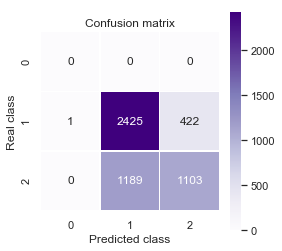

In [148]:
cm_lr = confusion_matrix(Y_test, Y_pred_round)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_lr, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

### Corrigés de la valeur aberrante

In [149]:
np.unique(Y_pred_round)

array([-2147483648,           0,           1])

In [150]:
Z=Y_pred_round
np.where(Z<0)

(array([2314], dtype=int64),)

In [151]:
Y_pred_round2 = np.delete(Y_pred_round, (2314), axis=0)
Y_test2 = np.delete(Y_test, (2314), axis=0)

In [152]:
accuracy_score(Y_test2, Y_pred_round2)

0.6865148861646234

In [153]:
print(classification_report(Y_test2, Y_pred_round2))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      2847
           1       0.72      0.48      0.58      2292

   micro avg       0.69      0.69      0.69      5139
   macro avg       0.70      0.67      0.66      5139
weighted avg       0.69      0.69      0.67      5139



Text(12.5, 0.5, 'Real class')

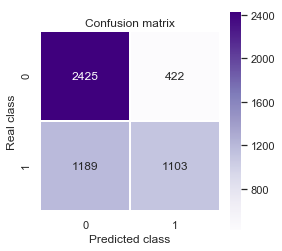

In [154]:
cm_lr = confusion_matrix(Y_test2, Y_pred_round2)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_lr, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

## Support Vector Machines (SVM)

### Model creation

In [155]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

### Model fitting

In [156]:
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Prediction

In [157]:
Y_pred = svc.predict(X_test)
Y_pred[:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

### Accuracy score

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.6702334630350194

### Classification report

In [159]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      2848
           1       0.67      0.52      0.59      2292

   micro avg       0.67      0.67      0.67      5140
   macro avg       0.67      0.66      0.66      5140
weighted avg       0.67      0.67      0.66      5140



### Confusion matrix

In [160]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[2248  600]
 [1095 1197]]


Text(12.5, 0.5, 'Real class')

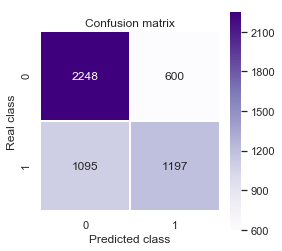

In [161]:
cm_lr = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_lr, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

## Naive Bayes

### Model creation

In [162]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

### Model fitting

In [163]:
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Prediction

In [164]:
Y_pred = gnb.predict(X_test)
Y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Accuracy score

In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.6367704280155642

### Classification report

In [166]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.95      0.74      2848
           1       0.80      0.24      0.38      2292

   micro avg       0.64      0.64      0.64      5140
   macro avg       0.71      0.60      0.56      5140
weighted avg       0.70      0.64      0.58      5140



### Confusion matrix

In [167]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[2712  136]
 [1731  561]]


Text(12.5, 0.5, 'Real class')

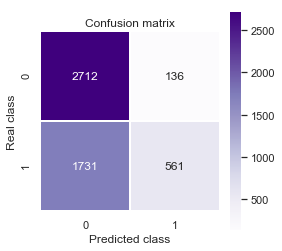

In [168]:
cm_lr = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_lr, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

## KNN

### Model creation

In [169]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

### Model fitting

In [170]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Prediction

In [172]:
Y_pred = knn.predict(X_test)
Y_pred[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [173]:
Y_prob = knn.predict_proba(X_test)
Y_prob[:10]

array([[0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6]])

### Accuracy score

In [174]:
knn.score(X_test, Y_test)

0.5501945525291829

In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.5501945525291829

### Classification report

In [176]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61      2848
           1       0.50      0.44      0.47      2292

   micro avg       0.55      0.55      0.55      5140
   macro avg       0.54      0.54      0.54      5140
weighted avg       0.55      0.55      0.55      5140



### Confusion matrix

In [177]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[1819 1029]
 [1283 1009]]


Text(12.5, 0.5, 'Real class')

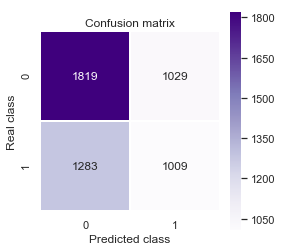

In [178]:
cm_lr = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_lr, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

# Unsupervised learning estimators

## K Means

### Model creation

In [179]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0)

### Model fitting

In [180]:
k_means.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

### Prediction

In [181]:
Y_pred = k_means.predict(X_test)
Y_pred[:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

### Accuracy score

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.5254863813229572

### Classification report

In [183]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58      2848
           1       0.47      0.46      0.46      2292

   micro avg       0.53      0.53      0.53      5140
   macro avg       0.52      0.52      0.52      5140
weighted avg       0.52      0.53      0.52      5140



### Confusion matrix

In [184]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[1654 1194]
 [1245 1047]]


Text(12.5, 0.5, 'Real class')

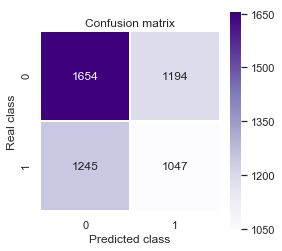

In [185]:
cm_lr = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax=sns.heatmap(cm_lr, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
               linewidths=0.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

# Does Kobe get "on fire" ? - The influence of the previous attempt

Kobe Bryant, and basketball players in general, are sometimes described as being "on fire" during a game : they manage to make long series of shots without missing any attempts.

We will now have a look at this aspect Kobe's career.

## Time between two attempts

First, let's have a look at how his previous attempt affects his next one : Is he more likely to take another shot right after a successful attempt ? Would he rather try to correct a mistake (a  missed shot) by not taking the next one ?

In [186]:
#Collecting the data
time_diff = {}
time_diff['made_last'] = []
time_diff['missed_last'] = []

dist_diff = {}
dist_diff['made_last'] = []
dist_diff['missed_last'] = []

after_success = []
after_fail = []

for shot in range(1,df.shape[0]):

    #Making sure the previous shot is in the same period
    same_game   = clean.loc[shot,'game_date'] == clean.loc[shot-1,'game_date']
    same_period = clean.loc[shot,'period'] == clean.loc[shot-1,'period']

    if same_period and same_game:
        made_last_shot = clean.loc[shot-1,'shot_made_flag'] == 1
        missed_last_shot = clean.loc[shot-1,'shot_made_flag'] == 0
        
        time_diff2 = clean.loc[shot-1,'time_remaining'] - clean.loc[shot,'time_remaining']
        dist_diff2 = clean.loc[shot,'shot_distance'] - clean.loc[shot-1,'shot_distance']
        
        #Making sure time_diff2 values are > 0
        if time_diff2 < 0:
            continue
        
        if made_last_shot:
            time_diff['made_last'].append(time_diff2)
            dist_diff['made_last'].append(dist_diff2)
            after_success.append(shot)
            
        if missed_last_shot:
            time_diff['missed_last'].append(time_diff2)
            dist_diff['missed_last'].append(dist_diff2)
            after_fail.append(shot)

after_fail2 = clean.iloc[after_fail,:]
after_success2   = clean.iloc[after_success,:]

attempts_after_success = after_success2.shape[0]
success_after_success = np.array(after_success2['shot_made_flag'] == 1).sum()

attempts_after_fail = after_fail2.shape[0]
success_after_fail = np.array(after_fail2['shot_made_flag'] == 1).sum()

Text(0, 0.5, 'counts')

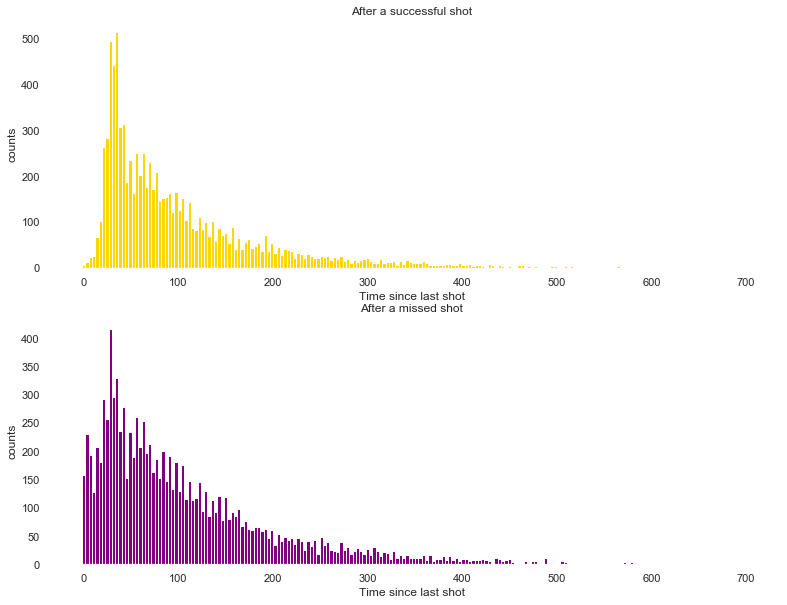

In [190]:
plt.rcParams['figure.figsize'] = (13, 10)

J, B = np.histogram(time_diff['made_last']+time_diff['missed_last'],bins=200)
W = B[1]-B[0]

hist_after_success, b = np.histogram(time_diff['made_last'],bins=B)
hist_after_fail, b = np.histogram(time_diff['missed_last'],bins=B)

plt.figure();
plt.subplot(2,1,1); plt.bar(b[:-1], hist_after_success, width = W, color="gold")
plt.title('After a successful shot'); plt.xlabel('Time since last shot'); plt.ylabel('counts')
plt.subplot(2,1,2); plt.bar(b[:-1], hist_after_fail, width = W, color="purple")
plt.title('After a missed shot'); plt.xlabel('Time since last shot'); plt.ylabel('counts')

We see that the general shapes of the histograms are more or less the same. The peak in case of a successful previous attempt is higher and larger though, which could be interpreted as Kobe's will of keeping on shooting when making a shot. That conclusion could have been expected thanks to Kobe Bryant's famous mindset he calls "Mamba mentality" : he's willing to give everything he has to "kill" his opponents.

We can also see that in the case Bryant misses his first try, there are some values very close to 0. They are due to the fact that after a missed attempt in basketball, the players "fight" for the rebound : the ball bounces out of the rim and the offensive team tries to get a second chance whereas the defensive team wants to obtain control of the ball. The values we are mentionning here are corresponding to the shots taken after an offensive rebound.

## Distance between two attempts

Then, let's try to see how missing a shot does affect the distance from which he is going to take the next shot.

Text(0, 0.5, 'counts')

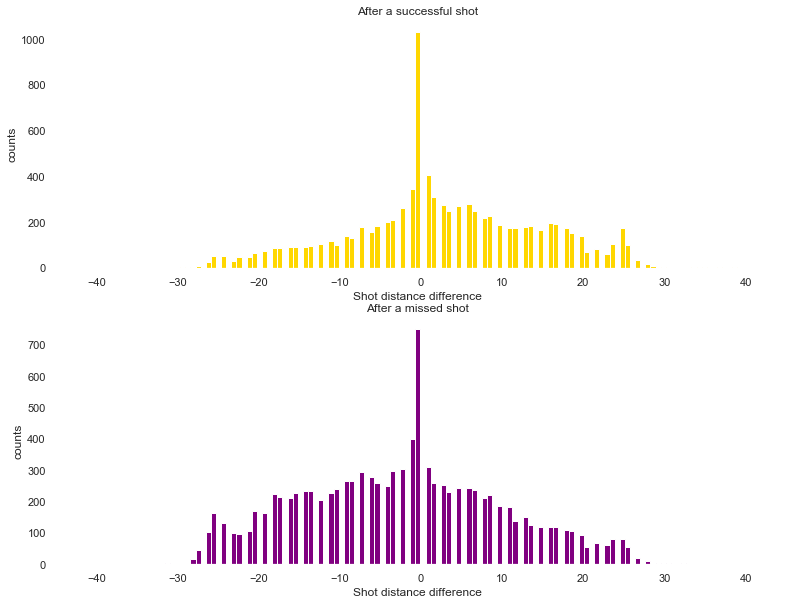

In [209]:
plt.rcParams['figure.figsize'] = (13, 10)

J, B = np.histogram(dist_diff['made_last']+dist_diff['missed_last'],bins=200)
W = B[1]-B[0]

hist_after_success, b = np.histogram(dist_diff['made_last'],bins=B[10:140])
hist_after_fail, b = np.histogram(dist_diff['missed_last'],bins=B[10:140])

plt.figure();
plt.subplot(2,1,1); plt.bar(b[:-1], hist_after_success, width = W, color="gold")
plt.title('After a successful shot'); plt.xlabel('Shot distance difference'); plt.ylabel('counts')
plt.subplot(2,1,2); plt.bar(b[:-1], hist_after_fail, width = W, color="purple")
plt.title('After a missed shot'); plt.xlabel('Shot distance difference'); plt.ylabel('counts')

First thing we see here is that there's a peak at 0 in both histograms : Kobe likes to take shots from the same distance as his previous attempt. It could be interpreted as his will of either correcting a missed attempt by making the next one or trying to keep on making a shot he's already made : in both case, the fact that he just took a shot from that range helps him finding the path to the basket. 

The fact that the peak is much higher in case of a successful first attempt reveals the fact that it is more important for him to indeed continue shooting from a range he just scored from. However, in the second histogram, we see that the negative numbers tend to be more significant : not only does Kobe want to correct his first miss by taking a shot from equal range but he is also more likely to even get closer to the basket to get a better look at the rim.

## Scoring after a first attempt

The conclusion we just drew seems pretty interesting but the best way to find out is to check his shooting percentage after his first shot : Does muscle memory help him score better or does the reduced distance help more ?

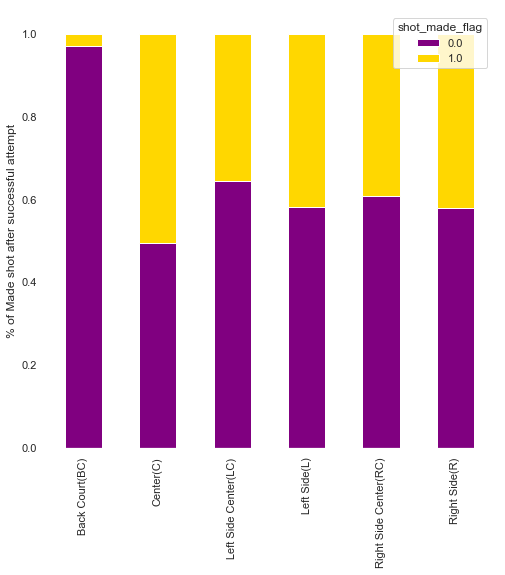

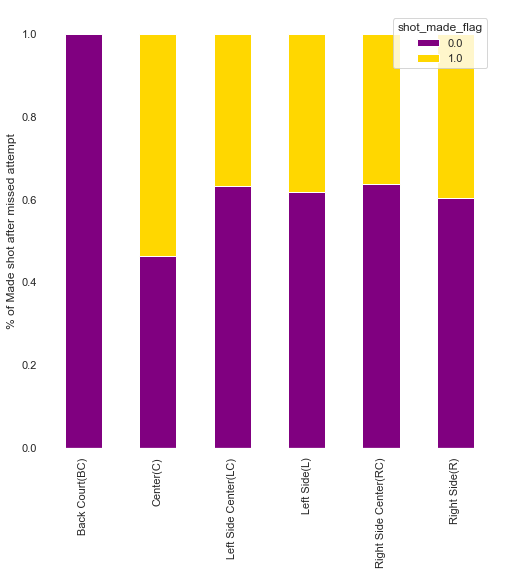

After a successful shot 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         0.969697  0.030303
Center(C)              0.494993  0.505007
Left Side Center(LC)   0.643070  0.356930
Left Side(L)           0.581312  0.418688
Right Side Center(RC)  0.606918  0.393082
Right Side(R)          0.578202  0.421798 
 
 
 After a missed shot 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         1.000000  0.000000
Center(C)              0.463230  0.536770
Left Side Center(LC)   0.632686  0.367314
Left Side(L)           0.618167  0.381833
Right Side Center(RC)  0.636111  0.363889
Right Side(R)          0.604044  0.395956


In [210]:
table1 = pd.crosstab(index=after_success2["shot_zone_area"], columns=after_success2["shot_made_flag"])

relative1 = table1.div(table1.sum(axis=1), axis=0)
relative1.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.xlabel('')
plt.ylabel('% of Made shot after successful attempt')
plt.show()

table2 = pd.crosstab(index=after_fail2["shot_zone_area"], columns=after_fail2["shot_made_flag"])

relative2 = table2.div(table2.sum(axis=1), axis=0)
relative2.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.xlabel('')
plt.ylabel('% of Made shot after missed attempt')
plt.show()

print("After a successful shot \n \n", relative1,"\n \n \n", "After a missed shot \n \n", relative2)

What we see here is that although the numbers vary a little according to whether or not he made his previous shot, there is no actual pattern that would help us with his accuracy. We could conclude that there is no such thing as the "hot hand effect" (or "being on fire") concerning Kobe since his numbers don't significantly increase when having scored a first basket.

## What about considering 2 shots before ?

To go further in this part and avoid jumping to conclusions, we'll do the same study but this time we will consider the 2 previous shots and see how Bryant is affected when making 2 shots and missing 2 shots.

In [211]:
after_2success = []
after_2fail = []

for shot in after_success:

    #Making sure the previous shot is in the same period
    same_game = clean.loc[shot,'game_date'] == clean.loc[shot-2,'game_date']
    same_period = clean.loc[shot,'period'] == clean.loc[shot-2,'period']

    if same_period and same_game:
        made_last_shot = clean.loc[shot-2,'shot_made_flag'] == 1
        
        if made_last_shot:
            after_2success.append(shot)

for shot in after_fail:

    #Careful with the first values
    if shot != 1:
        same_game = clean.loc[shot,'game_date'] == clean.loc[shot-2,'game_date']
        same_period = clean.loc[shot,'period'] == clean.loc[shot-2,'period']

        if same_period and same_game:
            missed_last_shot = clean.loc[shot-2,'shot_made_flag'] == 0
            
            if missed_last_shot:
                after_2fail.append(shot)

after_2fail2 = clean.iloc[after_2fail,:]
after_2success2 = clean.iloc[after_2success,:]

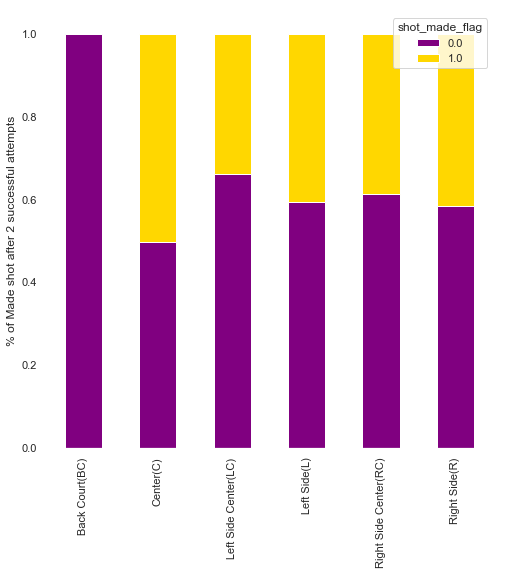

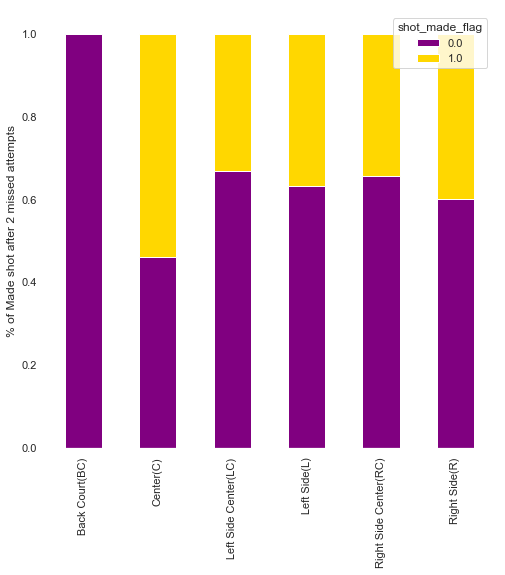

After 2 successful shots 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         1.000000  0.000000
Center(C)              0.495826  0.504174
Left Side Center(LC)   0.660079  0.339921
Left Side(L)           0.593085  0.406915
Right Side Center(RC)  0.612457  0.387543
Right Side(R)          0.582796  0.417204 
 
 
 After 2 missed shots 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         1.000000  0.000000
Center(C)              0.460825  0.539175
Left Side Center(LC)   0.668113  0.331887
Left Side(L)           0.631696  0.368304
Right Side Center(RC)  0.656530  0.343470
Right Side(R)          0.600332  0.399668


In [212]:
table3 = pd.crosstab(index=after_2success2["shot_zone_area"], columns=after_2success2["shot_made_flag"])

relative3 = table3.div(table3.sum(axis=1), axis=0)
relative3.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.xlabel('')
plt.ylabel('% of Made shot after 2 successful attempts')
plt.show()

table4 = pd.crosstab(index=after_2fail2["shot_zone_area"], columns=after_2fail2["shot_made_flag"])

relative4 = table4.div(table4.sum(axis=1), axis=0)
relative4.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.xlabel('')
plt.ylabel('% of Made shot after 2 missed attempts')
plt.show()

print("After 2 successful shots \n \n", relative3,"\n \n \n", "After 2 missed shots \n \n", relative4)

## Considering 3 consecutive baskets (and misses)

Let's finally do the same but with 3 shot attempts

In [213]:
after_3success = []
after_3fail = []

for shot in after_2success:

    same_game = clean.loc[shot,'game_date'] == clean.loc[shot-3,'game_date']
    same_period = clean.loc[shot,'period'] == clean.loc[shot-3,'period']

    if same_period and same_game:
        made_last_shot = clean.loc[shot-3,'shot_made_flag'] == 1
        
        if made_last_shot:
            after_3success.append(shot)

for shot in after_2fail:

    same_game = clean.loc[shot,'game_date'] == clean.loc[shot-3,'game_date']
    same_period = clean.loc[shot,'period'] == clean.loc[shot-3,'period']

    if same_period and same_game:
        missed_last_shot = clean.loc[shot-3,'shot_made_flag'] == 0
            
        if missed_last_shot:
            after_3fail.append(shot)

after_3fail2 = clean.iloc[after_3fail,:]
after_3success2 = clean.iloc[after_3success,:]

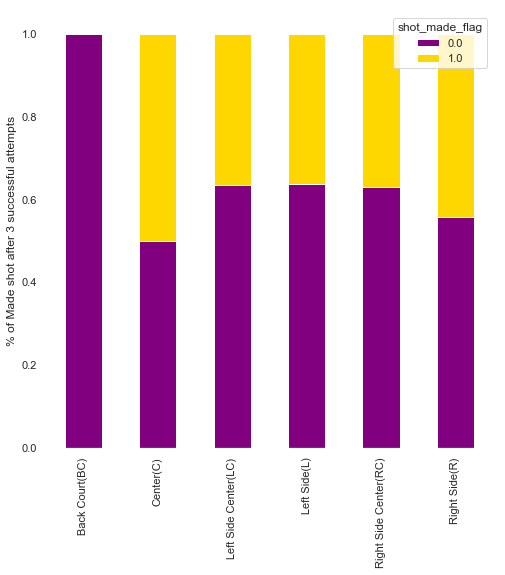

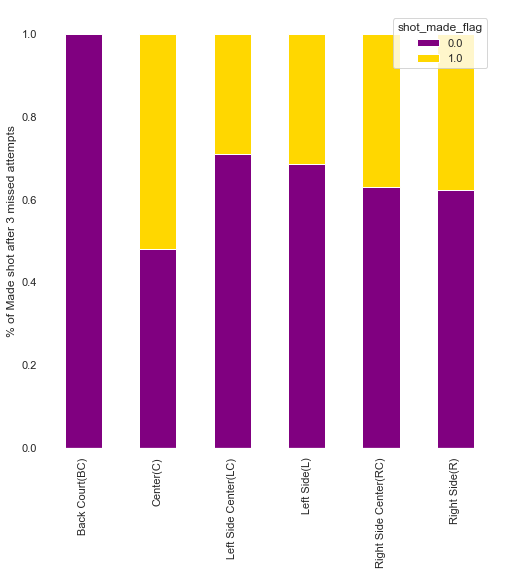

After 3 successful shots 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         1.000000  0.000000
Center(C)              0.498638  0.501362
Left Side Center(LC)   0.634146  0.365854
Left Side(L)           0.636364  0.363636
Right Side Center(RC)  0.629808  0.370192
Right Side(R)          0.556338  0.443662 
 
 
 After 3 missed shots 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         1.000000  0.000000
Center(C)              0.479943  0.520057
Left Side Center(LC)   0.709459  0.290541
Left Side(L)           0.684848  0.315152
Right Side Center(RC)  0.630000  0.370000
Right Side(R)          0.621891  0.378109


In [214]:
table5 = pd.crosstab(index=after_3success2["shot_zone_area"], columns=after_3success2["shot_made_flag"])

relative5 = table5.div(table5.sum(axis=1), axis=0)
relative5.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.xlabel('')
plt.ylabel('% of Made shot after 3 successful attempts')
plt.show()

table6 = pd.crosstab(index=after_3fail2["shot_zone_area"], columns=after_3fail2["shot_made_flag"])

relative6 = table6.div(table6.sum(axis=1), axis=0)
relative6.plot(kind="bar", figsize=(8,8), stacked=True, color=['purple', 'gold'])
plt.xlabel('')
plt.ylabel('% of Made shot after 3 missed attempts')
plt.show()

print("After 3 successful shots \n \n", relative5,"\n \n \n", "After 3 missed shots \n \n", relative6)

Again, apart from the Center area, Kobe is apparently more efficent after successful attempts than after misses. Let's now have a look at the values we obtained in this part of our study :

In [222]:
print("General accuracy \n \n", relative0, "\n\n\n", "After a successful shot \n \n", relative1, "\n\n\n", "After 2 successful shots \n \n", relative3, "\n\n\n", "After 3 successful shots \n \n", relative5)

General accuracy 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         0.986111  0.013889
Center(C)              0.474444  0.525556
Left Side Center(LC)   0.638823  0.361177
Left Side(L)           0.603129  0.396871
Right Side Center(RC)  0.617433  0.382567
Right Side(R)          0.598342  0.401658 


 After a successful shot 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         0.969697  0.030303
Center(C)              0.494993  0.505007
Left Side Center(LC)   0.643070  0.356930
Left Side(L)           0.581312  0.418688
Right Side Center(RC)  0.606918  0.393082
Right Side(R)          0.578202  0.421798 


 After 2 successful shots 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         1.000000  0.000000
Center(C)              0.495826  0.504174
Left Side Center(LC)   0.660079  0.339921
Left Side(L)           0.593085 

In [223]:
print("General accuracy \n \n", relative0, "\n\n\n", "After a missed shot \n \n", relative2, "\n\n\n", "After 2 missed shots \n \n", relative4, "\n\n\n", "After 3 missed shots \n \n", relative6)

General accuracy 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         0.986111  0.013889
Center(C)              0.474444  0.525556
Left Side Center(LC)   0.638823  0.361177
Left Side(L)           0.603129  0.396871
Right Side Center(RC)  0.617433  0.382567
Right Side(R)          0.598342  0.401658 


 After a missed shot 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         1.000000  0.000000
Center(C)              0.463230  0.536770
Left Side Center(LC)   0.632686  0.367314
Left Side(L)           0.618167  0.381833
Right Side Center(RC)  0.636111  0.363889
Right Side(R)          0.604044  0.395956 


 After 2 missed shots 
 
 shot_made_flag              0.0       1.0
shot_zone_area                           
Back Court(BC)         1.000000  0.000000
Center(C)              0.460825  0.539175
Left Side Center(LC)   0.668113  0.331887
Left Side(L)           0.631696  0.36830